# **Statistical Data Analysis 2** - Project 2

---

## Project Overview  

The goal of this project is to apply different Variational Autoencoders (VAEs) to biological data by customizing a VAE using probabilistic modelling.

### Submission and grading

To pass the project you must provide the **source code** used to obtain results, a file with saved **trained model**, and a **report** discussing them.

#### **Source code**

* You can use Jupyter Notebook or Google Colab. In this case, you should submit a `.ipynb` file that can be uploaded to Colab and executed without the need to implement any other operations such as environment set-up, installing packages, setting up access to the dataset etc.
  - All of the necessary operations should be implemented and working!!!
  - **REMEMBER to also include a file with the saved trained model!** The notebook should have an option of providing the path to the saved trained model to reproduce results without the training process.
  - You need to upload the `.ipynb` file. We won't accept solutions submitted by sharing links to Colab notebook (it can be edited after the deadline).


* If you prefer to work locally with scripts you can share a link to a **GitHub repository**. Ensure the repository can be cloned and scripts can be easily executed to replicate results. The repository should include:
  - conda (preferred) environment set up file (`.yaml` or `.txt`)
  - the dataset
  - file with saved trained models
  - `train.py` file that trains and *saves* the models
  - `eval.py` file that loads the trained model and reproduces all the results and figures included in the report
  - `README` file explaining how to use your repository

#### **Report**

* Report can be submitted as a separate `.pdf` file (preferred).

* Alternatively you can include your report in the `.ipynb` file consisting of two parts:
The first part (*report*) should include answers to all the questions, results and figures (embed them into text cells) and a discussion. *No computations should be required to compile the report!*
The second part (*code*) should include reproducible Python code that meets the requirements described in the "Source code" section. Make sure the code cells' output is visible.

  Convert the `.ipynb` file to `.pdf` or `.html` file. Make sure the report part is visible, but the code cells' output is not. Including code in this file is optional.

* Report can be written either in English or Polish.

Reports (`.pdf`, `.html`), `.ipynb` files and links to GitHub repositories should be submitted via Moodle. Make sure all the links work.

### Grading criteria

* Content and style of the report, proper formatting, quality of visualizations (each figure should be captioned and titled, and all axes should be labelled etc.)

* Quality of answers and conclusions. You are expected to show your understanding of the subject especially the theoretical background. If you do not provide mathematical definitions and do not use mathematical notations in theoretical answers you will not get the points. Make sure your answers are comprehensive and cohesive.

* Readability and reproducibility of the code.

* Your solution can be based on available implementations (especially those from Pytorch documentation).You are supposed to implement this simple Gaussian VAE yourself. We understand that your solutions will be inspired by available implementatrion. However, keep in mind that if your implementation will be a straight-up copy of existing implementation points will be deducted. That's why it's crucial that you describe and explain your methodology, so that we can be sure you understand the architecture and theory behind it. Moreover, if the suspicion of using generative AI to generate significant part of the code or report arises the points will be deducted. In both cases you might be invited to provide further explanation. You must demonstrate a full understanding of your solution. The same applies if the two solutions are suspiciously similar.

---



## Data  

### Single Cell RNA Sequencing  

In this project, we will use data from single-cell RNA sequencing (scRNA-seq).

Organs such as the pancreas are made up of many types of tissues, which in turn consist of many cell types. Within the pancreas, we can identify organ-specific cells such as alpha or beta cells and blood cells, which include immune cells. Traditional sequencing methods such as microarrays or bulk-RNA sequencing allow for measuring the expression of RNA in large populations of cells. In mixed cell populations, for example biopsy samples from the pancreas, these measurements may obscure critical differences between individual cells within these populations. The scRNA-seq measures RNA expression in the individual cells. Gene expression pattern analysis can uncover the existence of rare cell types within a cell population that may never have been seen before, which is crucial in understanding the differences between pathological and healthy tissues. The single-cell sequencing methods are especially useful in cancer research.

In scRNA-seq cells are tagged by short amino-acid sequences called tags, which are effectively their ID (you will see them in our dataset). The result of a scRNA-seq experiment is a **gene expression matrix** that contains the number of mRNA transcripts of the selected set of genes that are present in each of the analyzed cells. As a result, we get the **transcriptomic profile** of each cell - a vector of mRNA counts. Higher counts indicate higher gene expression. In terms of statistics, we can treat individual cells as observations and genes as variables, whose values are mRNA counts.

The most common convention is that *rows* of gene expression matrices correspond cells and *columns* to genes.

### Dataset  

The dataset was collected from the bone marrow of human donors. The cells collected are mostly cells of the immune system. This dataset was released as a part of [NeurIPS 2021 “Open Problems in Single Cell Analysis” competition](https://openproblems.bio/neurips_2021/).  

#### How to download the dataset?  

The data can be downloaded from [Google Drive](https://drive.google.com/drive/folders/12n25qoAv_zCM270ERAjgHHb3Uk0-xL-w?usp=sharing). You have access to two files containing gene expression matrices for training and testing, respectively. Look at Task 1 point 1 for instructions.

# Tasks  

A general tip is to play around with a small subset of data (e.g., 1000 cells) first and only after you finish prototyping run models and other experiments on all data.

---

## Task 1: **Data Exploration** (1 point)  

In this Task it will be helpful to use `anndata` and `scanpy` libraries. AnnData is a package used to operate on `.h5ad` objects that is commonly used in scRNA-seq analysis. Scanpy is a toolkit for analyzing single-cell gene expression data built jointly with `anndata`. It includes preprocessing, visualization, clustering, trajectory inference and differential expression testing.

* [AnnData Quick Tutorial](https://adamgayoso.com/posts/ten_min_to_adata)
* [AnnData Official tutorial](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
* [Scanpy documentation](https://scanpy.readthedocs.io/en/stable/index.html)
* [Scanpy tutorials](https://scanpy.readthedocs.io/en/stable/tutorials/index.html)

We will be dealing with sparse matrices, but you can always cast it to dense (watch out for OOM) using the method `sparse_matrix.toarray()`.  

1. Use `gdown` to download the dataset from google drive.
  - link to training data: https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM
  - link to test dataset: https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV

2. Load datasets using `adata = anndata.read_h5ad(path)`.
  1. Report how many observations and variables the loaded training and test datasets contain.
  2. What exactly are observations and variables?
      - *Hint*: `adata_obs_names` and `adata.var_names`).

3. Access the `adata.obs` object for training and testing dataset. Explain in your report what information do these dataframes contain. In your explanation include answers to the following questions for both training and testing datasets.
  1. How many patients participated in the research?
  2. What information is available about the patients?
  3. What information is available about the cells?
  4. Report number of cell types.
  5. Report number of laboratories where samples were prepared.
  6. Report number of batches, explain what they are and how they were designed.

4. ( *Optional* ) Plot number of observations for each cell type and each patient (*Hint*: `adata.obs.groupby(...)`, `df.plot(kind='barh', stacked=True)`, order cell types from the most common among all patients to the least common). Comment on what you see, why there are such differences between patients?

4. Access the `adata.X` object, which contains an already preprocessed count matrix and the `adata.layers['counts']` object, which contains raw data.

  1. Plot distributions (histograms) of the values from both the raw count matrix and the processed count matrix. X-axis should be the count values and Y-axis their frequency in the matrix. Pay attention to the range of values spanned by the data. What are those ranges?
  2. How many zeros are there and what does their abundance mean in biological context?
    - *Hint*: Think about why different cells have different transcription profiles.
  3. Remove the highest counts (for better readability) and plot distributions again.
  4. What would you say is the distribution of counts in a gene expression matrix? Explain why you think so.
    - *Hint:* Look at the shape of the histogram and literature about scRNA-seq.

5. As was mentioned in the previous point, the count matrix has been preprocessed and it can be found in `adata.X`, while the raw count matrix can be found in `adata.layers['counts']`.
  1. Explain what transformations are usually applied to raw counts before further analysis of scRNA-seq data and what for.
    - *Hint*: Scanpy documentation, [10xgenomics](https://www.10xgenomics.com/analysis-guides/single-cell-rna-seq-data-normalization), and other
  2. Explain what kind of preprocessing has been applied in this case (`adata.X`).
    - *Hint 1.* You can check minimum, maximum, mean (no need to cast to dense matrix!), etc.
    - *Hint 2.* It's different than standard preprocessing (look at literature and Scanpy documentation).
    - *Hint 3.* What is size factor in scRNA-seq and what is `GEX_size_factor`?
  3. Suggest what additional data transformations could be applied (it could be either to raw or processed matrix). Could they help in trainig VAE?  

---


### Task 2: **VAE implementation** (3 points)  

In this task you will implement Variational Autoencoder (Gaussian VAE) that can be trained on scRNA-seq data. The input and output should be the gene expression matrix (in this case a batch would consist of transcriptomic profiles for a subset of cells).

Remember that VAE needs to have a **stochastic Encoder** and **Decoder** and be trained with a **probabilistic loss**.

>**Notation**:
* $Z$ is a latent space
* $p(z)$ is *prior distribution* over the latent space
* $E(x)$ is an encoder
* $\phi$ are encoder network weights
* $D(z)$ is a decoder
* $\theta$ are decoder network weights

1. Implement `Encoder` and `Decoder` class in such a way that number of hidden layers, their sizes as well as size of latent space can be changed (you will need this to select the best size for the latent space). Each of them needs to have their `forward` method. Explain in your report what is output of Encoder and Decoder network in term of distributions (*Hint*: What are $q_\phi(z | x)$ and $p_\theta(x | z)$?)

2. Explain what *reparametrization trick* is. How and why is it used? Provide the mathematical formula and reasoning why it works.

3. Implement `VariationalAutoEncoder`class that combines `Encoder` and `Decoder` and includes:

  1. `reparameterize` method that implements *reparametrization trick* according to the formula from point 2.
  2. `sample_latent` method which accepts the original transcriptomic profile as input and outputs samples from the approximate posterior distribution $q_\phi(z|x)$.

---


### Task 3: **Kullback-Leibler divergence and ELBO** (3 points)

1. Explain what Kullback-Leibler divergence is and how it is in connected to VAE.

2. What is reconstruction loss? What should be the reconstruction loss in our case? Include a formula in the report.

3. What is ELBO? How is it connected to VAE? How is KL divergence connected to ELBO? How can ELBO be used to approximate $q_\phi(z | x)$ (math!)?

4. Implement `KL_divergence` function that computes the Kullback-Leibler divergence between $q_\phi(z | x)$ and $p(z)$. What is the assumed prior distribution of latent space $p(z)$ in Gaussian VAE? Include the formula your implementation is based on in your report.

5. Implement `ELBO` function. Include the formula your implementation is based on in your report.
  - *Hint 1*: See Appendix B from VAE paper: Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014, https://arxiv.org/abs/1312.6114,
  - *Hint 2*: Use the `KL_divergence` function from previous point.

6. ( *Optional* ) What is $\beta$-VAE? Explain how it differs from Vanilla VAE (math). Give an example (problem type, data type etc), where $\beta$-VAE would be better suited than Vanilla VAE. Give an example where it might not. Explain why.

---

### Task 4: **VAE training, latent space exploration and model selection** (4 points)

1. Prepare three pairs of training and testing datasets.

  1. raw count matrix (`adata.layers['counts']`)
  2. provided preprocessed matrix (`adata.X`)
  3. matrix processed as suggested in Task 1 point 5 (*Hint*: Copy matrix you will be processing further and save it in `adata.layers['counts_processed']`)

  For loading datsets for training and testing, [AnnLoader](https://anndata.readthedocs.io/en/latest/generated/anndata.experimental.AnnLoader.html) might be helpful.

2. Select a few different VAE architectures (that's where implementation from Task 2 point 1 comes in handy). Check at least 3 different sizes of latent space.

3. Train VAE models (different architectures and datasets). Note that testing dataset is in fact validation dataset and is used during training process.
  1. Verify the training procedure by showing learning curves. A learning curve for VAE usually plots the $-ELBO$ against epoch number.
  2. Break down $ELBO$ according to its decomposition and plot both losses separately.
    - *Hint 1.* What is reconstruction and regularization loss in VAE?
    - *Hint 2.* See Task 3 point 3 and 5.

4. Create a table showing different latent space sizes and different datasets and report the $-ELBO$, reconstruction and regularization loss on the test dataset for each model. Comment on the results.

5. Visualize latent space using t-SNE, UMAP or PCA.

  1. Explain which method you have chosen and how it works (no need for math, explain the intuition). You can visualize the sample from testing dataset, not the whole dataset, if the plots are hard to read.
  2. Color the plots by `adata.obs.cell_type`.
  3. Inspect those visualizations and comment on the results.

6. Select the final model. Explain the decision making process behind choosing the dataset and model's architecture (size of latent space). (*Hint*: Combine your observations from point 3 and 4 and come up with the consclusion.)

7. Visualize latent space of the selected model and color it by `adata.obs.DonorNumber`, `adata.obs.batch` and `adata.obs.Site`. Discuss what you see and include the figures in your report. (*Hint:* What are the batch effects?)

8. Compare visualization of latent space of your final model with selected dimentionality reduction method used on final test dataset. Color it by `adata.obs.cell_type`, `adata.obs.DonorNumber`, `adata.obs.batch` and `adata.obs.Site`. You can do it using [Scanpy](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html): [t-SNE](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.tsne.html), [UMAP](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.umap.html), [PCA](https://scanpy.readthedocs.io/en/stable/api/generated/scanpy.pl.pca.html). Compare and comment on the results.

---

### Task 5: Write a report (3 points)

1. Write a final report. Below are suggested sections (you can structure it differently but it needs to be cohesive and easy to understand)
  1. Data Exploration.
  2. VAE theoretical background - here you can include answers to theoretical questions from Task 2 and 3.
  3. Methods
    - describe architecture and important implementation details
    - describe datasets
    - describe training parameters, loss functions and metrics used
  4. Results - here you can discuss model selection, results, visualizations, comparison.
  5. Conclusions



## Data

In [1]:
import gc
gc.collect()

159

In [2]:
!pip install gdown

In [1]:
# using gdown
!gdown https://drive.google.com/uc?id=1yiFiwgm7Gy8_t_mhydZsnFyHDJAjC5tM -O GEX_train.h5ad # training dataset
!gdown https://drive.google.com/uc?id=1n2gLk95wRA55y84STdnJGlmjDqMjNfwV -O GEX_test.h5ad # testing dataset

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # training dataset
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # testing dataset


In [2]:
!pip install anndata

In [3]:
!pip install scanpy

In [1]:
import anndata
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scanpy
import torch.nn.functional as F
import pandas as pd

## Data Exploration

In [18]:
train = anndata.read_h5ad("C:\\Users\\aurin\\Desktop\\sad2\\projekt2\\GEX_train.h5ad")
test = anndata.read_h5ad("C:\\Users\\aurin\\Desktop\\sad2\\projekt2\\GEX_test.h5ad")

In [ ]:
train

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'

In [ ]:
# number of observations for the training dataset
train.obs_names

Index(['AGTTCCCAGCACCTGC-1-s3d1', 'CAGATTGCAAAGGCAC-1-s2d1',
       'GTCATGACAATTTCCT-1-s1d2', 'TCATCCGCACTTGGCG-1-s2d5',
       'AGTGCCGGTCATCAGT-1-s2d5', 'TCTAACTGTGACCTGC-1-s2d5',
       'CTAAGTGCAGTTCTAG-1-s2d1', 'GCTACAACACGTTCGG-1-s1d3',
       'TGACGCGTCAGCTGAT-1-s4d9', 'AGTGCCGAGTACGAGC-1-s3d7',
       ...
       'CTCATCGAGCTCACTA-1-s3d6', 'GTCTAGACACTTGAGT-1-s4d9',
       'CGCAGGTAGAACTTCC-1-s3d7', 'TCATTCATCTATCGTT-1-s2d1',
       'GCAACATAGCGAGTAC-1-s2d1', 'AGTCATGAGGTTTACC-1-s3d7',
       'GTGAGCCTCGCAGATT-1-s2d1', 'GTCATTTTCCATTGCC-1-s2d1',
       'CGCATGGAGAACCCGA-1-s1d1', 'TGGGAGATCCTCTGCA-1-s4d1'],
      dtype='object', length=72208)

There are 72208 barcodes. Barcode is a name of the molecular tag. Barcodes are the short form for describing single cells, however they're not equal because of the possibility of the technique artifacts, for example duplicates.

In [ ]:
# number of observations for the testing dataset
test.obs_names

Index(['AGTTCCCAGCACCTGC-1-s3d1', 'CAGATTGCAAAGGCAC-1-s2d1',
       'GTCATGACAATTTCCT-1-s1d2', 'TCATCCGCACTTGGCG-1-s2d5',
       'AGTGCCGGTCATCAGT-1-s2d5', 'TCTAACTGTGACCTGC-1-s2d5',
       'CTAAGTGCAGTTCTAG-1-s2d1', 'GCTACAACACGTTCGG-1-s1d3',
       'TGACGCGTCAGCTGAT-1-s4d9', 'AGTGCCGAGTACGAGC-1-s3d7',
       ...
       'ACGGTTATCACAACCA-1-s3d1', 'GTGTTAGCACGTTGGC-1-s1d2',
       'GTTATGGTCACCATGA-1-s3d7', 'CACAACATCAATCGGT-1-s2d1',
       'ACGGAAGTCTTACGTT-1-s1d3', 'TAGATCGCAATTCTCT-1-s3d7',
       'CTGCAGGCACTACACA-1-s3d6', 'GTGAGTTGTCCAGTTA-1-s2d4',
       'ATGAGGGCAGACCGCT-1-s4d1', 'GCACGGTGTTGTACGT-1-s4d1'],
      dtype='object', length=18052)

here are 18 052 barcodes

In [ ]:
# number of variables (genes)
train.var_names

Index(['HES4', 'ISG15', 'AGRN', 'TNFRSF18', 'TNFRSF4', 'C1QTNF12', 'ATAD3C',
       'ATAD3B', 'ATAD3A', 'FNDC10',
       ...
       'TKTL1', 'LAGE3', 'UBL4A', 'DKC1', 'MPP1', 'VBP1', 'CLIC2', 'F8A3',
       'MT-CO3', 'AC011043.1'],
      dtype='object', length=5000)

In [ ]:
# number of variables
test.var_names

Index(['HES4', 'ISG15', 'AGRN', 'TNFRSF18', 'TNFRSF4', 'C1QTNF12', 'ATAD3C',
       'ATAD3B', 'ATAD3A', 'FNDC10',
       ...
       'TKTL1', 'LAGE3', 'UBL4A', 'DKC1', 'MPP1', 'VBP1', 'CLIC2', 'F8A3',
       'MT-CO3', 'AC011043.1'],
      dtype='object', length=5000)

There are 5000 genes. Number of variables is the same for each dataset.

### data nalysis

In [6]:
metadane_train = train.obs
metadane_train

GEX_n_genes_by_counts  GEX_pct_counts_mt  \
AGTTCCCAGCACCTGC-1-s3d1                    948           5.113025   
CAGATTGCAAAGGCAC-1-s2d1                   2323           4.077203   
GTCATGACAATTTCCT-1-s1d2                   1952           7.838442   
TCATCCGCACTTGGCG-1-s2d5                   1811           7.071157   
AGTGCCGGTCATCAGT-1-s2d5                    796           4.107981   
...                                        ...                ...   
AGTCATGAGGTTTACC-1-s3d7                   1108           9.544659   
GTGAGCCTCGCAGATT-1-s2d1                   2821           9.352348   
GTCATTTTCCATTGCC-1-s2d1                   1810           2.792384   
CGCATGGAGAACCCGA-1-s1d1                    434           0.239860   
TGGGAGATCCTCTGCA-1-s4d1                   3721           4.887395   

                         GEX_size_factors GEX_phase  \
AGTTCCCAGCACCTGC-1-s3d1          1.371097       G2M   
CAGATTGCAAAGGCAC-1-s2d1          2.426149         S   
GTCATGACAATTTCCT-1-s1d2          0.854908       G2M   
TCATCCGCACTTGGCG-1-s2d5          1.387475       G2M   
AGTGCCGGTCATCAGT-1-s2d5          0.520903         S   
...                                   ...       ...   
AGTCATGAGGTTTACC-1-s3d7          0.616979       G2M   
GTGAGCCTCGCAGATT-1-s2d1          3.336449         S   
GTCATTTTCCATTGCC-1-s2d1          1.473857         S   
CGCATGGAGAACCCGA-1-s1d1          0.039444       G2M   
TGGGAGATCCTCTGCA-1-s4d1          2.535835         S   

                         ADT_n_antibodies_by_counts  ADT_total_counts  \
AGTTCCCAGCACCTGC-1-s3d1                         139            2278.0   
CAGATTGCAAAGGCAC-1-s2d1                          91            1190.0   
GTCATGACAATTTCCT-1-s1d2                         123            4138.0   
TCATCCGCACTTGGCG-1-s2d5                         105             707.0   
AGTGCCGGTCATCAGT-1-s2d5                          96             945.0   
...                                             ...               ...   
AGTCATGAGGTTTACC-1-s3d7                         114            1140.0   
GTGAGCCTCGCAGATT-1-s2d1                          90             474.0   
GTCATTTTCCATTGCC-1-s2d1                          95            1327.0   
CGCATGGAGAACCCGA-1-s1d1                         131            6829.0   
TGGGAGATCCTCTGCA-1-s4d1                         134            6974.0   

                         ADT_iso_count            cell_type batch  \
AGTTCCCAGCACCTGC-1-s3d1           23.0           CD14+ Mono  s3d1   
CAGATTGCAAAGGCAC-1-s2d1            2.0         Erythroblast  s2d1   
GTCATGACAATTTCCT-1-s1d2           14.0  Naive CD20+ B IGKC+  s1d2   
TCATCCGCACTTGGCG-1-s2d5            2.0           CD14+ Mono  s2d5   
AGTGCCGGTCATCAGT-1-s2d5            4.0                   NK  s2d5   
...                                ...                  ...   ...   
AGTCATGAGGTTTACC-1-s3d7            7.0           CD14+ Mono  s3d7   
GTGAGCCTCGCAGATT-1-s2d1            5.0           Lymph prog  s2d1   
GTCATTTTCCATTGCC-1-s2d1            1.0         Erythroblast  s2d1   
CGCATGGAGAACCCGA-1-s1d1            9.0         Reticulocyte  s1d1   
TGGGAGATCCTCTGCA-1-s4d1           31.0       Transitional B  s4d1   

                         ADT_pseudotime_order  ...  DonorID DonorAge DonorBMI  \
AGTTCCCAGCACCTGC-1-s3d1                   NaN  ...    15078       34     24.8   
CAGATTGCAAAGGCAC-1-s2d1              0.965441  ...    15078       34     24.8   
GTCATGACAATTTCCT-1-s1d2                   NaN  ...    10886       35     28.6   
TCATCCGCACTTGGCG-1-s2d5                   NaN  ...    16710       40     27.8   
AGTGCCGGTCATCAGT-1-s2d5                   NaN  ...    16710       40     27.8   
...                                       ...  ...      ...      ...      ...   
AGTCATGAGGTTTACC-1-s3d7                   NaN  ...    11466       22     31.5   
GTGAGCCTCGCAGATT-1-s2d1                   NaN  ...    15078       34     24.8   
GTCATTTTCCATTGCC-1-s2d1              0.977025  ...    15078       34     24.8   
CGCATGGAGAACCCGA-1-

train.obs is the metadata.


In [ ]:
train.obs["DonorID"].unique()

array([15078, 10886, 16710, 18303, 13272, 11466, 28045, 19593, 12710])

In [ ]:
test.obs["DonorID"].unique()

array([15078, 10886, 16710, 18303, 13272, 11466, 28045, 19593, 12710])

In [ ]:
len(train.obs["DonorID"].unique())

9

In [ ]:
len(test.obs["DonorID"].unique())

9

in the dataset we have 9 patients

In [ ]:
train.obs.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

we have the following information about the patients: \

'DonorNumber', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType','DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds' 'DonorSmoker'. \

we have the following information about the cells: \
'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors' 'GEX_phase', 'ADT_n_antibodies_by_counts' 'ADT_total_counts', 'ADT_iso_count' 'cell_type', 'batch', 'ADT_pseudotime_order',
'GEX_pseudotime_order'


In [ ]:
# number of cell types -> 45
metadane_train["cell_type"].unique()

['CD14+ Mono', 'Erythroblast', 'Naive CD20+ B IGKC+', 'NK', 'NK CD158e1+', ..., 'Plasmablast IGKC-', 'dnT', 'CD8+ T naive CD127+ CD26- CD101-', 'Plasmablast IGKC+', 'cDC1']
Length: 45
Categories (45, object): ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T CD314+ CD45RA+', 'CD4+ T activated',
                          ..., 'dnT', 'gdT CD158b+', 'gdT TCRVD2+', 'pDC']

In the dataset there are the following cell types (45): \
CD14+ Mono \
Erythroblast \
Naive CD20+ B IGKC+ \
NK \
NK CD158e1+ \
CD8+ T naive \
CD4+ T activated \
Naive CD20+ B IGKC- \
CD4+ T naive \
Normoblast \
MK/E prog \
CD16+ Mono \
Lymph prog \
HSC \
CD8+ T CD57+ CD45RA+ \
T reg \
Plasma cell IGKC- \
Transitional B \
Reticulocyte \
CD8+ T TIGIT+ CD45RO+ \
cDC2 \
Proerythroblast \
pDC \
Plasma cell IGKC+ \
CD4+ T activated integrinB7+ \
CD8+ T CD57+ CD45RO+ \
MAIT \
B1 B IGKC+ \
B1 B IGKC- \
CD8+ T TIGIT+ CD45RA+ \
gdT CD158b+ \
G/M prog \
CD8+ T CD69+ CD45RA+ \
CD8+ T CD49f+ \
ILC1 \
T prog cycling \
CD8+ T CD69+ CD45RO+ \
ILC \
CD4+ T CD314+ CD45RA+ \
gdT TCRVD2+ \
Plasmablast IGKC- \
dnT \
CD8+ T naive CD127+ CD26- CD101- \
Plasmablast IGKC+ \
cDC1 \

In [ ]:
# number of laboratories where samples were prepared -> 4
metadane_train["Site"].unique()

['site3', 'site2', 'site1', 'site4']
Categories (4, object): ['site1', 'site2', 'site3', 'site4']

In [ ]:
# number of batches -> 12
metadane_train["batch"].unique()

['s3d1', 's2d1', 's1d2', 's2d5', 's1d3', ..., 's4d1', 's1d1', 's3d6', 's4d8', 's2d4']
Length: 12
Categories (12, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d7', 's4d1', 's4d8', 's4d9']

In [ ]:
for n in metadane_train["batch"].unique():
  print(n)

s3d1
s2d1
s1d2
s2d5
s1d3
s4d9
s3d7
s4d1
s1d1
s3d6
s4d8
s2d4


how batches were designed: \
devided by 4 sites and 9 donors \

In [ ]:
# number of observations for each cell type
cell_types_rate = metadane_train.iloc[:1000].groupby(["DonorID", "cell_type"]).size().unstack(fill_value=0)

<ipython-input-19-5497282bd5a7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_types_rate = metadane_train.iloc[:1000].groupby(["DonorID", "cell_type"]).size().unstack(fill_value=0)


In [ ]:
cell_types_rate

cell_type  B1 B IGKC+  B1 B IGKC-  CD4+ T CD314+ CD45RA+  CD4+ T activated  \
DonorID                                                                      
10886               1           0                      1                 8   
11466               1           0                      0                 7   
12710               0           0                      0                 5   
13272               2           2                      0                11   
15078               5           5                      0                29   
16710               0           0                      0                 9   
18303               0           0                      0                 5   
19593               3           0                      0                 3   
28045               0           0                      0                 3   

cell_type  CD4+ T activated integrinB7+  CD4+ T naive  CD8+ T CD49f+  \
DonorID                                                                
10886                                 3             4              0   
11466                                 0             3              0   
12710                                 1             4              0   
13272                                 2             4              0   
15078                                 7            24              3   
16710                                 1             3              1   
18303                                 4             6              0   
19593                                 0             1              0   
28045                                 0             4              2   

cell_type  CD8+ T CD57+ CD45RA+  CD8+ T CD57+ CD45RO+  CD8+ T CD69+ CD45RA+  \
DonorID                                                                       
10886                         2                     0                     0   
11466                         0                     1                     0   
12710                         0                     0                     0   
13272                         0                     1                     0   
15078                         2                     1                     1   
16710                         0                     2                     0   
18303                         2                     0                     0   
19593                         1                     9                     2   
28045                         7                     2                     3   

cell_type  ...  Reticulocyte  T prog cycling  T reg  Transitional B  cDC1  \
DonorID    ...                                                              
10886      ...             4               0      0               1     0   
11466      ...             2               1      0               3     0   
12710      ...             8               0      0               1     0   
13272      ...             3               0      0               7     0   
15078      ...            15               0      5               2     0   
16710      ...             2               0      0               0     0   
18303      ...            13               0      0               5     0   
19593      ...             0               0      1               1     0   
28045      ...             5               0      0               2     0   

cell_type  cDC2  dnT  gdT CD158b+  gdT TCRVD2+  pDC  
DonorID                                              
10886         0    0            1            0    1  
11466         1    0            0            0    3  
12710         0    0            0            1    0  
13272         0    0            7            0    1  
15078         6    0            1            0    6  
16710         1    0            0            0    2  
18303         0    0            1            0    0  
19593         1    0            0            0    1  
28045         2    0            0            0    7  

[9 rows x 45 columns]

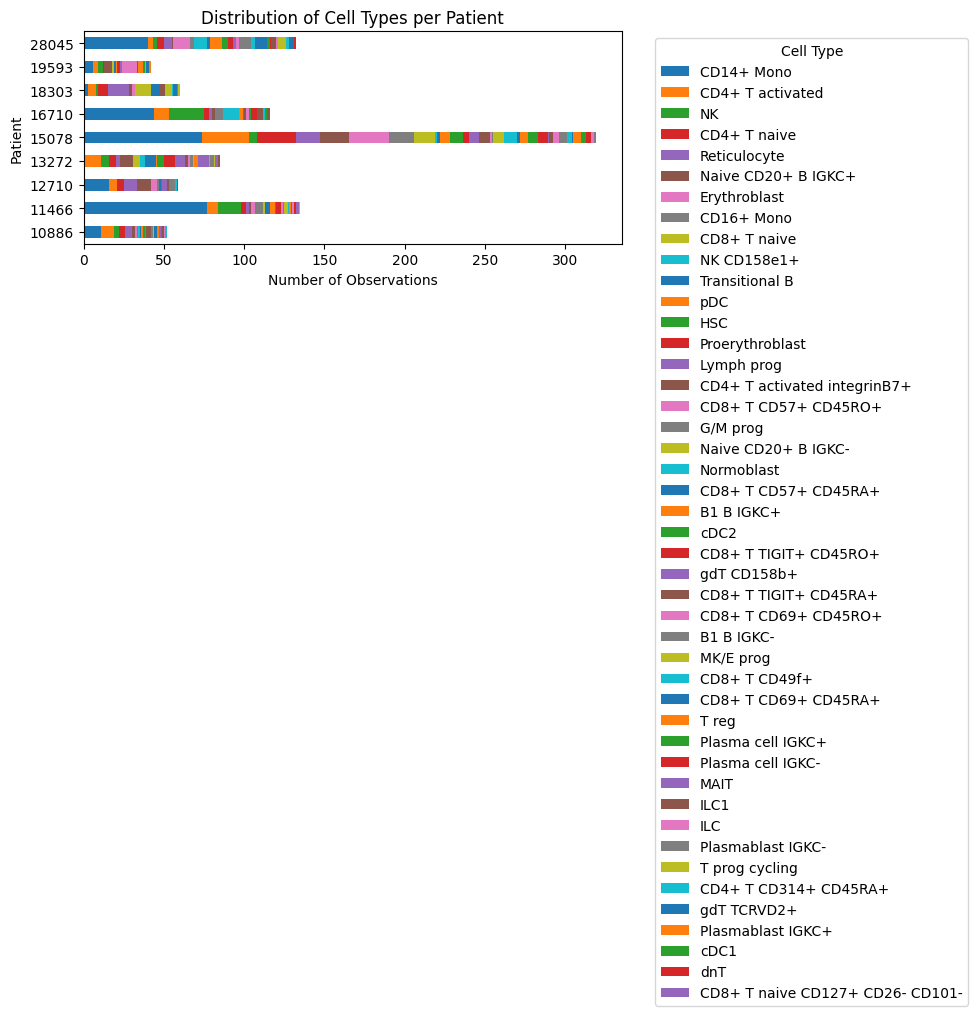

In [ ]:
order = cell_types_rate.sum(axis=0).sort_values(ascending=False).index
cell_counts = cell_types_rate[order]

ax = cell_counts.plot(kind='barh', stacked=True, figsize=(10, 7))
plt.xlabel("Number of Observations")
plt.ylabel("Patient")
plt.title("Distribution of Cell Types per Patient")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
cell_sum = np.array(train.layers['counts'].sum(axis=1)).flatten()
cell_sum

array([  554.,  9290.,  1409., ...,  8383., 13320.,  4739.], dtype=float32)

#### Calculate the number of cells and counts for each donor

   DonorID  num_cells  total_counts
0    10886       3985    11232214.0
1    11466       9147    13156031.0
2    12710       4472    16613360.0
3    13272       5869    16028103.0
4    15078      24535    53445232.0
5    16710       7328     7025296.0
6    18303       4857    20011562.0
7    19593       3188     8694741.0
8    28045       8827    13412074.0


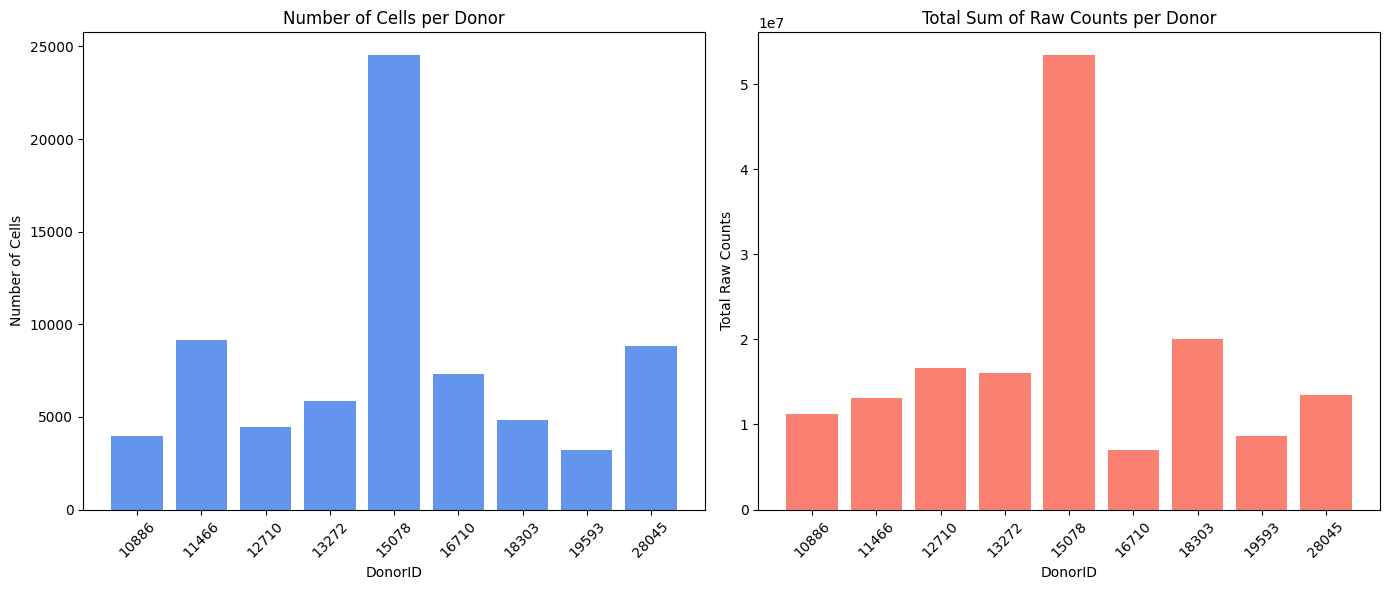

In [ ]:
# Calculate the sum of raw counts for each cell.
# Handle both sparse and dense matrices.
cell_sum = np.array(train.layers['counts'].sum(axis=1)).flatten()

# Add the computed per-cell sum to adata.obs.
train.obs['raw_sum'] = cell_sum

# Group by 'DonorID' to compute:
# - num_cells: count of cells per donor
# - total_counts: sum of raw counts per donor (across all cells)
donor_summary = train.obs.groupby('DonorID').agg(
    num_cells=('raw_sum', 'count'),
    total_counts=('raw_sum', 'sum')
).reset_index()


# Plotting the number of cells and the sum of counts for each donor
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for the number of cells per donor
axes[0].bar(donor_summary['DonorID'].astype(str), donor_summary['num_cells'], color='cornflowerblue')
axes[0].set_title("Number of Cells per Donor")
axes[0].set_xlabel("DonorID")
axes[0].set_ylabel("Number of Cells")
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for the sum of raw counts per donor
axes[1].bar(donor_summary['DonorID'].astype(str), donor_summary['total_counts'], color='salmon')
axes[1].set_title("Total Sum of Raw Counts per Donor")
axes[1].set_xlabel("DonorID")
axes[1].set_ylabel("Total Raw Counts")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The reason behind the bigger number of observations of patient 15078 is a bigger sample size - for this patient, more cells were sampled and sequenced.

### Count Frequency

The reason behind the shape of the distribution of the number of counts are the expression profiles. Each cell is highly specialized and they express the genes acociated with its profile.

In [ ]:
preprocessed_counts = train.X
processed_data = preprocessed_counts.toarray().flatten()

In [ ]:
raw_counts = train.layers['counts']
raw_data = raw_counts.toarray().flatten()

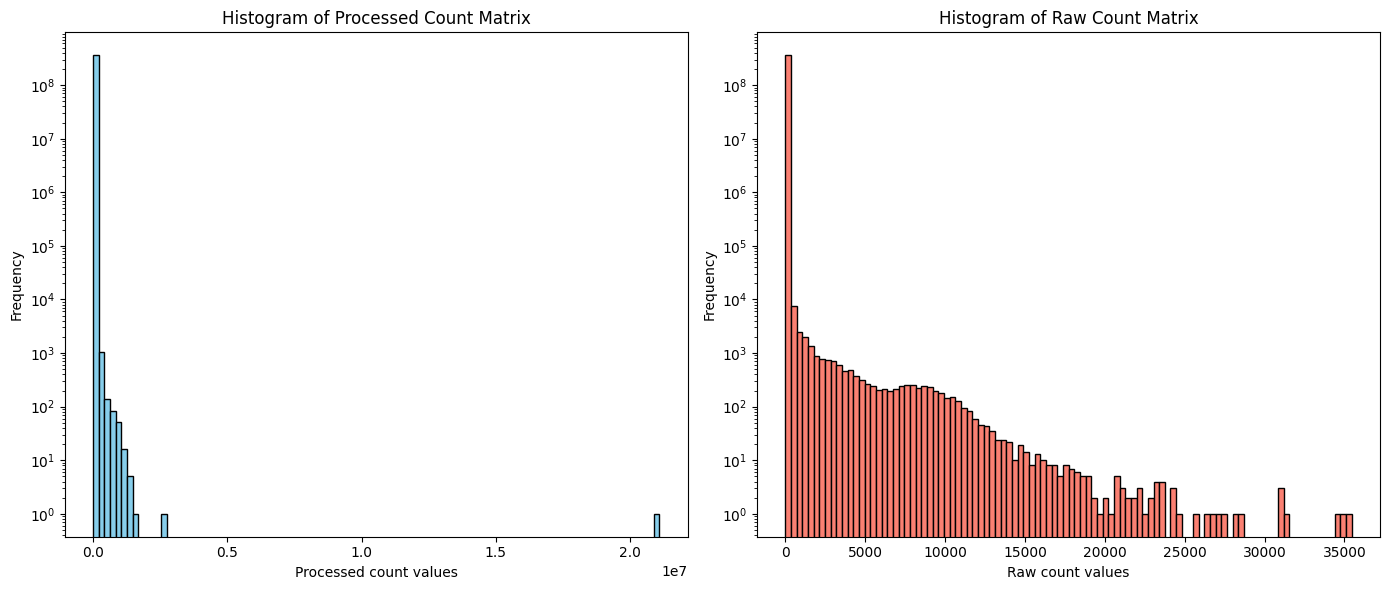

In [ ]:
# Plot histograms of the full distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(processed_data, bins=100, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Processed count values")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Processed Count Matrix")
axes[0].set_yscale('log')

axes[1].hist(raw_data, bins=100, color='salmon', edgecolor='black')
axes[1].set_xlabel("Raw count values")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Raw Count Matrix")
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

The 0 count values are abundant in the distribution (around 10^8-10^9). There are "truely biological" 0 counts where there is no expression, and the dropout, where the mRNA is expressed but is not detected. Due to the dropout effect and cell heterogeneity, the fraction of zeroes is even at 90%.

The scRNA-seq count data is usually modelled using negative binomial distribution, for example to select top variable features.

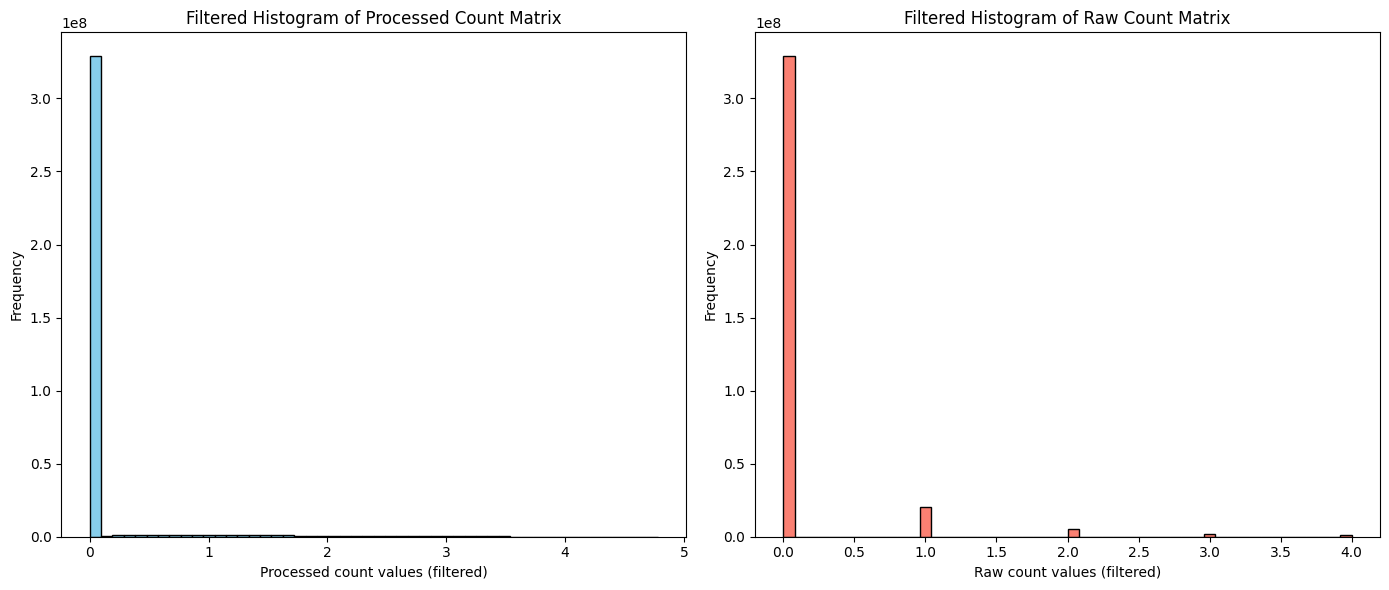

In [ ]:
# Remove the highest counts for better readability
# Here we filter out values above the 99th percentile
proc_thresh = np.percentile(processed_data, 99)
raw_thresh = np.percentile(raw_data, 99)

processed_filtered = processed_data[processed_data <= proc_thresh]
raw_filtered = raw_data[raw_data <= raw_thresh]

# Plot the filtered distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(processed_filtered, bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Processed count values (filtered)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Filtered Histogram of Processed Count Matrix")

axes[1].hist(raw_filtered, bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel("Raw count values (filtered)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Filtered Histogram of Raw Count Matrix")

plt.tight_layout()
plt.show()


The vast majority of counts is 0 (3x10^8) or low-expressive (0.2x10^8)

### Preprocessing

In [7]:
# raw data
print(f"Min: {train.layers['counts'].min()}")
print(f"Max: {train.layers['counts'].max()}")
print(f"Mean: {train.layers['counts'].mean()}")

Min: 0.0
Max: 35451.0
Mean: 0.4421078860759735


In [8]:
# processed data
print(f"Min: {train.X.min()}")
print(f"Max: {train.X.max()}")
print(f"Mean: {train.X.mean()}")

Min: 0.0
Max: 21078940.0
Mean: 3.427403211593628


In [9]:
train.obs["GEX_size_factors"][:10]

AGTTCCCAGCACCTGC-1-s3d1    1.371097
CAGATTGCAAAGGCAC-1-s2d1    2.426149
GTCATGACAATTTCCT-1-s1d2    0.854908
TCATCCGCACTTGGCG-1-s2d5    1.387475
AGTGCCGGTCATCAGT-1-s2d5    0.520903
TCTAACTGTGACCTGC-1-s2d5    0.496833
CTAAGTGCAGTTCTAG-1-s2d1    0.489712
GCTACAACACGTTCGG-1-s1d3    0.960225
TGACGCGTCAGCTGAT-1-s4d9    0.305750
AGTGCCGAGTACGAGC-1-s3d7    1.253895
Name: GEX_size_factors, dtype: float64

#### log transform

In [19]:
raw_counts = train.X
processed = scanpy.pp.log1p(raw_counts)

In [20]:
print(f"Min: {processed.min()}")
print(f"Max: {processed.max()}")
print(f"Mean: {processed.mean()}")

Min: 0.0
Max: 16.863784790039062
Mean: 0.09294214844703674


## VAE

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [4]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, dropout = 0.3, z_dropout = 0.3):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                     nn.ReLU(),
                                     nn.Dropout(p=dropout),
                                     nn.Linear(hidden_dim, hidden_dim),
                                     nn.Dropout(p=dropout)
                                     )

        self.mu = nn.Linear(hidden_dim, latent_dim)
        self.var = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
      x = self.encoder(x)
      mu = self.mu(x)
      var = self.var(x)
      return mu, var

In [5]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim, dropout = 0.3):
        super().__init__()
        self.decoder = nn.Sequential(nn.Linear(latent_dim, hidden_dim),
                                     nn.ReLU(),
                                     nn.Dropout(p=dropout),
                                     nn.Linear(hidden_dim, output_dim))

        #self.mu_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        z = self.decoder(z)
        #output = self.mu_out(z)
        return z

In [6]:
class VAE(nn.Module):
    def __init__(self, input_dim, enc_hidden, dec_hidden, latent_dim):
        super().__init__()

        self.encoder = Encoder(input_dim, enc_hidden, latent_dim)
        self.decoder = Decoder(latent_dim, dec_hidden, input_dim)

    def reparametrize(self, mu, var):
        std = torch.exp(0.5 * var)
        epsilon = torch.randn_like(std)
        return mu + epsilon * std

    def sample_latent(self, x):
        mu, var = self.encoder(x)
        z = self.reparametrize(mu, var)
        return z

    def forward(self, x):
        mu, var = self.encoder(x)
        z = self.reparametrize(mu, var)
        out = self.decoder(z)
        return out, mu, var



In [7]:
def KL_divergence(mu, var):
  kl = -0.5 * torch.sum(1 + var - mu.pow(2) - var.exp(), dim=0)
  return kl

def ELBO(inp_dec, x, mu, var):
  recon_loss = F.mse_loss(inp_dec, x, reduction='mean')
  kl_loss = torch.sum(KL_divergence(mu, var))
  return recon_loss + kl_loss

### Preapring datasets

In [8]:
raw_train = train.layers['counts']
prep_train = train.X
proc_train = scanpy.pp.log1p(prep_train)

raw_test = test.layers['counts']
prep_test = test.X
proc_test = scanpy.pp.log1p(prep_test)

datasets = {'preprocessed': (prep_train, prep_test),
            'processed': (proc_train, proc_test)}

In [9]:
output_dir = "C:\\Users\\aurin\\Desktop\\sad2\\projekt2"

In [10]:
def train_f(model, train_loader, optimizer, device, epoch, beta=1.0):
    model.train()
    train_loss = 0
    recon_losses, reg_losses = 0, 0
    latent_train = []

    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass: compute reconstructions and latent parameters
        recon_data, mu, logvar = model(data)
        recon_loss = F.mse_loss(recon_data, data, reduction='mean')
        #print(">>>", recon_loss)
        regul_loss = KL_divergence(mu, logvar)
        recon_losses += recon_loss
        reg_losses += regul_loss
        loss = ELBO(recon_data, data, mu, logvar)

        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}"
                  f" ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}")

        m, v = model.encoder(data)
        latent_train.append(m.cpu().detach().numpy())

    latent_train = np.concatenate(latent_train, axis = 0)

    avg_loss = train_loss / len(train_loader.dataset)
    # print(">>>avg: ", avg_loss)
    rec_loss = recon_losses / len(train_loader.dataset)
    # print("<<<<rec: ", rec_loss)
    reg_loss = reg_losses / len(train_loader.dataset)
    # print("!!!! reg: ", reg_loss)
    print(f"====> Epoch: {epoch} Average loss: {avg_loss:.4f}")
    return avg_loss, rec_loss, reg_loss, latent_train

def test_f(model, test_loader, device, beta=1.0):
    model.eval()
    test_loss = 0
    recon_losses, reg_losses = 0, 0
    latent_test = []

    with torch.no_grad():
        for data_tuple in test_loader:
            data = data_tuple[0].to(device)
            recon_data, mu, logvar = model(data)
            loss = ELBO(recon_data, data, mu, logvar)
            test_loss += loss.item()
            recon_loss = F.mse_loss(recon_data, data, reduction='mean')
            #print(">>>", recon_loss)
            regul_loss = KL_divergence(mu, logvar)
            recon_losses += recon_loss
            reg_losses += regul_loss
            m, v = model.encoder(data)
            latent_test.append(mu.cpu().detach().numpy())

    latent_test = np.concatenate(latent_test, axis = 0)

    avg_test_loss = test_loss / len(test_loader.dataset)
    rec_loss = recon_losses / len(test_loader.dataset)
    reg_loss = reg_losses / len(test_loader.dataset)
    print(f"====> Test set loss: {avg_test_loss:.4f}")
    return avg_test_loss, rec_loss, reg_loss, latent_test


### testing different sizes of latent space

#### latent space = 10

Train Epoch: 1 [0/72208 (0%)]	Loss: 0.049001
Train Epoch: 1 [5120/72208 (7%)]	Loss: 0.005255
Train Epoch: 1 [10240/72208 (14%)]	Loss: 0.001794
Train Epoch: 1 [15360/72208 (21%)]	Loss: 0.001543
Train Epoch: 1 [20480/72208 (28%)]	Loss: 0.001364
Train Epoch: 1 [25600/72208 (35%)]	Loss: 0.001144
Train Epoch: 1 [30720/72208 (42%)]	Loss: 0.001104
Train Epoch: 1 [35840/72208 (49%)]	Loss: 0.001007
Train Epoch: 1 [40960/72208 (56%)]	Loss: 0.000937
Train Epoch: 1 [46080/72208 (63%)]	Loss: 0.000875
Train Epoch: 1 [51200/72208 (70%)]	Loss: 0.000818
Train Epoch: 1 [56320/72208 (77%)]	Loss: 0.000776
Train Epoch: 1 [61440/72208 (85%)]	Loss: 0.000743
Train Epoch: 1 [66560/72208 (92%)]	Loss: 0.000691
Train Epoch: 1 [71680/72208 (99%)]	Loss: 0.000647
====> Epoch: 1 Average loss: 0.0040
====> Test set loss: 0.0002
Train Epoch: 2 [0/72208 (0%)]	Loss: 0.000638
Train Epoch: 2 [5120/72208 (7%)]	Loss: 0.000622
Train Epoch: 2 [10240/72208 (14%)]	Loss: 0.000580
Train Epoch: 2 [15360/72208 (21%)]	Loss: 0.000545


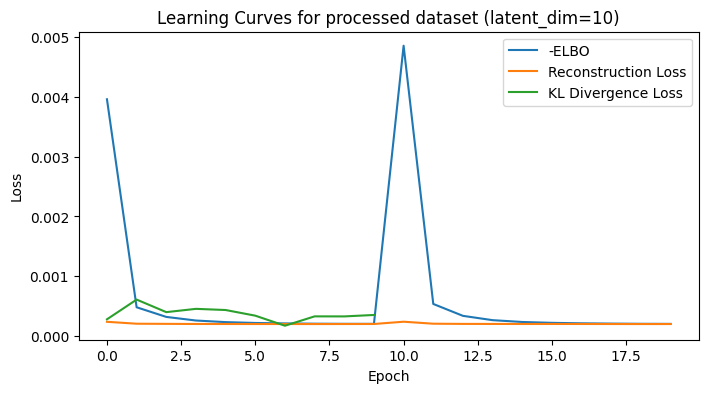

In [11]:


# Hyperparameters and settings
batch_size = 512
epochs = 10
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []
latent_dim = 10
elbo_list = []
recon_list = []
reg_list = []

input_dim = proc_train.shape[1]

for ds_name, (X_train_np, X_test_np) in datasets.items():
    
    # Create PyTorch datasets and loaders
    X_train = torch.tensor(X_train_np.A, dtype=torch.float32)
    X_test = torch.tensor(X_test_np.A, dtype=torch.float32)
    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=False)

    # Encoder and decoder parameters
    enc_hidden_dims = 256
    dec_hidden_dims = 256

    # model and optimizer initialization
    model1 = VAE(input_dim, enc_hidden_dims, dec_hidden_dims, latent_dim).to(device)
    optimizer = optim.Adam(model1.parameters(), lr=learning_rate)

    # Training loop
    

    for epoch in range(1, epochs + 1):
        elbo, recon_loss, reg_loss, latent_train = train_f(model1, train_loader, optimizer, device, epoch)
        #print(">>>>", float(recon_loss))
        elbo_t, recon_loss_t, reg_loss_t, latent_test = test_f(model1, test_loader, device)
        
        #print(">>>>", elbo)
        elbo_list.append(elbo)
        recon_list.append(float(recon_loss))
        #print("<<<<", recon_list)
        reg_list.append(reg_loss)

                # tables
    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo,
                "Reconstruction": recon_loss,
                "Regularization": reg_loss}
                )

    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo_t,
                "Reconstruction": recon_loss_t,
                "Regularization": reg_loss_t}
                )





    # Plot the learning curves
    
plt.figure(figsize=(8, 4))
plt.plot(elbo_list, label="-ELBO")
plt.plot(recon_list, label="Reconstruction Loss")
plt.plot(reg_list[0].tolist(), label="KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curves for {ds_name} dataset (latent_dim={latent_dim})")
plt.legend()
plt.show()


        
torch.save(model1.state_dict(), f"{output_dir}/model1.pt")

In [ ]:
results1 = [{'Dataset': 'preprocessed',
'Latent dim': 10,
'ELBO': 0.0002053198922584822,
'Reconstruction': 0.0002,
'Regularization': np.mean([1.1934e-07, 3.3918e-07, 2.1620e-07, 2.8395e-07, 2.0430e-07, 8.1921e-08,
        4.7562e-08, 1.1815e-07, 1.9499e-07, 1.9092e-07])},
{'Dataset': 'preprocessed',
'Latent dim': 10,
'ELBO': 0.000176689036127775,
'Reconstruction': 0.0002,
'Regularization': 0},
{'Dataset': 'processed',
'Latent dim': 10,
'ELBO': 0.00020513256950687337,
'Reconstruction': 0.0002,
'Regularization': np.mean([2.0546e-07, 3.4819e-07, 7.7009e-08, 2.8365e-07, 1.3525e-07, 3.4787e-07,
        1.2087e-07, 2.8333e-07, 5.1065e-07, 2.2228e-07])},
{'Dataset': 'processed',
'Latent dim': 10,
'ELBO': 0.00017642100415290156,
'Reconstruction': 0.0002,
'Regularization': 0}]

In [ ]:
results_df = pd.DataFrame(results1)
results_df

Dataset  Latent dim      ELBO  Reconstruction  Regularization
0  preprocessed          10  0.000205          0.0002    1.796513e-07
1  preprocessed          10  0.000177          0.0002    0.000000e+00
2     processed          10  0.000205          0.0002    2.534559e-07
3     processed          10  0.000176          0.0002    0.000000e+00

#### latent space = 50

Train Epoch: 1 [0/72208 (0%)]	Loss: 0.234910
Train Epoch: 1 [5120/72208 (7%)]	Loss: 0.013840
Train Epoch: 1 [10240/72208 (14%)]	Loss: 0.009392
Train Epoch: 1 [15360/72208 (21%)]	Loss: 0.005757
Train Epoch: 1 [20480/72208 (28%)]	Loss: 0.004412
Train Epoch: 1 [25600/72208 (35%)]	Loss: 0.003652
Train Epoch: 1 [30720/72208 (42%)]	Loss: 0.003199
Train Epoch: 1 [35840/72208 (49%)]	Loss: 0.002713
Train Epoch: 1 [40960/72208 (56%)]	Loss: 0.002415
Train Epoch: 1 [46080/72208 (63%)]	Loss: 0.002187
Train Epoch: 1 [51200/72208 (70%)]	Loss: 0.001897
Train Epoch: 1 [56320/72208 (77%)]	Loss: 0.001773
Train Epoch: 1 [61440/72208 (85%)]	Loss: 0.001592
Train Epoch: 1 [66560/72208 (92%)]	Loss: 0.001413
Train Epoch: 1 [71680/72208 (99%)]	Loss: 0.001288
====> Epoch: 1 Average loss: 0.0106
====> Test set loss: 0.0002
Train Epoch: 2 [0/72208 (0%)]	Loss: 0.001261
Train Epoch: 2 [5120/72208 (7%)]	Loss: 0.001164
Train Epoch: 2 [10240/72208 (14%)]	Loss: 0.001084
Train Epoch: 2 [15360/72208 (21%)]	Loss: 0.000987


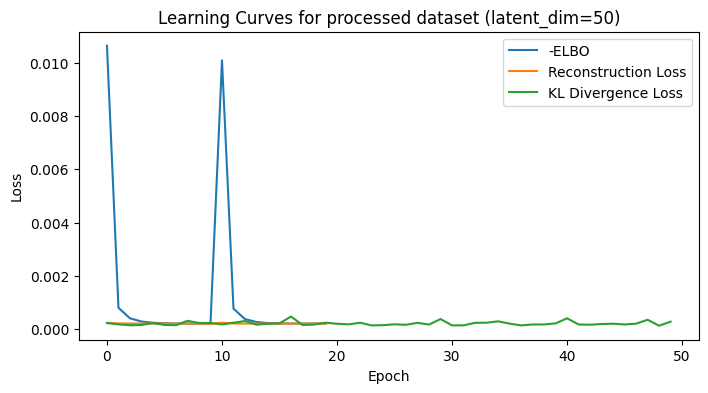

NameError: name 'model1' is not defined

In [ ]:

# Hyperparameters and settings
batch_size = 512
epochs = 10
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []
latent_dim = 50
elbo_list = []
recon_list = []
reg_list = []

input_dim = proc_train.shape[1]

for ds_name, (X_train_np, X_test_np) in datasets.items():
    
    # Create PyTorch datasets and loaders
    X_train = torch.tensor(X_train_np.A, dtype=torch.float32)
    X_test = torch.tensor(X_test_np.A, dtype=torch.float32)
    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=False)

    # Encoder and decoder parameters
    enc_hidden_dims = 256
    dec_hidden_dims = 256

    # model and optimizer initialization
    model2 = VAE(input_dim, enc_hidden_dims, dec_hidden_dims, latent_dim).to(device)
    optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

    # Training loop
    

    for epoch in range(1, epochs + 1):
        elbo, recon_loss, reg_loss, latent_train = train_f(model2, train_loader, optimizer, device, epoch)
        #print(">>>>", float(recon_loss))
        elbo_t, recon_loss_t, reg_loss_t, latent_test = test_f(model2, test_loader, device)
        
        #print(">>>>", elbo)
        elbo_list.append(elbo)
        recon_list.append(float(recon_loss))
        #print("<<<<", recon_list)
        reg_list.append(reg_loss)

                # tables
    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo,
                "Reconstruction": recon_loss,
                "Regularization": reg_loss}
                )

    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo_t,
                "Reconstruction": recon_loss_t,
                "Regularization": reg_loss_t}
                )





    # Plot the learning curves
    
plt.figure(figsize=(8, 4))
plt.plot(elbo_list, label="-ELBO")
plt.plot(recon_list, label="Reconstruction Loss")
plt.plot(reg_list[0].tolist(), label="KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curves for {ds_name} dataset (latent_dim={latent_dim})")
plt.legend()
plt.show()


        
torch.save(model1.state_dict(), f"{output_dir}/model2.pt")

In [14]:
torch.save(model2.state_dict(), f"{output_dir}/model2.pt")

In [16]:
results2 = [{'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.00020266618732748474,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([3.7847e-10, 2.5011e-10, 1.5436e-10, 3.3679e-10, 1.5890e-10, 2.4681e-10,
          5.3985e-10, 2.8850e-10, 2.5300e-10, 3.7930e-10, 4.0613e-10, 3.7517e-10,
          6.5418e-10, 3.2399e-10, 3.6444e-10, 2.3278e-10, 2.8478e-10, 2.4888e-10,
          2.4227e-10, 2.4062e-10, 3.5990e-10, 2.4516e-10, 4.4121e-10, 2.3608e-10,
          4.4987e-10, 2.8932e-10, 1.7500e-10, 4.4162e-10, 3.5949e-10, 2.9056e-10,
          1.9605e-10, 2.9056e-10, 4.0695e-10, 5.1797e-10, 4.4451e-10, 1.8614e-10,
          2.0389e-10, 5.3655e-10, 3.7393e-10, 2.8024e-10, 5.5677e-10, 2.3856e-10,
          2.8808e-10, 2.8066e-10, 4.7918e-10, 3.3142e-10, 2.4475e-10, 3.8136e-10,
          1.4776e-10, 3.4422e-10])},
 {'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.00017642884073812418,
  'Reconstruction': 0.0002,
  'Regularization': 0},
 {'Dataset': 'processed',
  'Latent dim': 50,
  'ELBO': 0.00020290599319132104,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([3.8797e-11, 4.5400e-11, 1.3207e-10, 5.4480e-11, 6.7275e-11, 6.0671e-11,
          9.6991e-11, 9.6579e-11, 3.7558e-11, 8.7911e-11, 7.5529e-11, 8.2546e-11,
          1.0772e-10, 7.8831e-11, 8.3371e-11, 9.5340e-11, 4.2098e-11, 4.1686e-11,
          6.8513e-11, 7.5117e-11, 7.9244e-11, 1.2630e-10, 7.8006e-11, 1.2217e-10,
          7.8831e-11, 5.2417e-11, 1.4115e-10, 1.7252e-10, 4.5400e-11, 2.9716e-11,
          5.0766e-11, 1.4322e-10, 1.1639e-10, 6.8926e-11, 4.0860e-11, 6.3560e-11,
          8.7086e-11, 1.0153e-10, 6.5211e-11, 5.9433e-11, 1.0401e-10, 6.2322e-11,
          7.7180e-11, 1.5684e-10, 7.4704e-11, 5.2417e-11, 4.4575e-11, 1.2093e-10,
          7.1815e-11, 3.8797e-11])},
 {'Dataset': 'processed',
  'Latent dim': 50,
  'ELBO': 0.00017673788475004368,
  'Reconstruction': 0.0002,
  'Regularization': 0}]

result2_df = pd.DataFrame(results2)
result2_df

Dataset  Latent dim      ELBO  Reconstruction  Regularization
0  preprocessed          50  0.000203          0.0002    3.275418e-10
1  preprocessed          50  0.000176          0.0002    0.000000e+00
2     processed          50  0.000203          0.0002    7.989618e-11
3     processed          50  0.000177          0.0002    0.000000e+00

In [ ]:
results2 = [{'Dataset': 'preprocessed',
  'hidden size': 256,
  'ELBO': 0.00020266618732748474,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([3.7847e-10, 2.5011e-10, 1.5436e-10, 3.3679e-10, 1.5890e-10, 2.4681e-10,
          5.3985e-10, 2.8850e-10, 2.5300e-10, 3.7930e-10, 4.0613e-10, 3.7517e-10,
          6.5418e-10, 3.2399e-10, 3.6444e-10, 2.3278e-10, 2.8478e-10, 2.4888e-10,
          2.4227e-10, 2.4062e-10, 3.5990e-10, 2.4516e-10, 4.4121e-10, 2.3608e-10,
          4.4987e-10, 2.8932e-10, 1.7500e-10, 4.4162e-10, 3.5949e-10, 2.9056e-10,
          1.9605e-10, 2.9056e-10, 4.0695e-10, 5.1797e-10, 4.4451e-10, 1.8614e-10,
          2.0389e-10, 5.3655e-10, 3.7393e-10, 2.8024e-10, 5.5677e-10, 2.3856e-10,
          2.8808e-10, 2.8066e-10, 4.7918e-10, 3.3142e-10, 2.4475e-10, 3.8136e-10,
          1.4776e-10, 3.4422e-10])},
 {'Dataset': 'preprocessed',
  'hidden size': 256,
  'ELBO': 0.00017642884073812418,
  'Reconstruction': 0.0002,
  'Regularization': 0},
 {'Dataset': 'processed',
  'hidden size': 256,
  'ELBO': 0.00020290599319132104,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([3.8797e-11, 4.5400e-11, 1.3207e-10, 5.4480e-11, 6.7275e-11, 6.0671e-11,
          9.6991e-11, 9.6579e-11, 3.7558e-11, 8.7911e-11, 7.5529e-11, 8.2546e-11,
          1.0772e-10, 7.8831e-11, 8.3371e-11, 9.5340e-11, 4.2098e-11, 4.1686e-11,
          6.8513e-11, 7.5117e-11, 7.9244e-11, 1.2630e-10, 7.8006e-11, 1.2217e-10,
          7.8831e-11, 5.2417e-11, 1.4115e-10, 1.7252e-10, 4.5400e-11, 2.9716e-11,
          5.0766e-11, 1.4322e-10, 1.1639e-10, 6.8926e-11, 4.0860e-11, 6.3560e-11,
          8.7086e-11, 1.0153e-10, 6.5211e-11, 5.9433e-11, 1.0401e-10, 6.2322e-11,
          7.7180e-11, 1.5684e-10, 7.4704e-11, 5.2417e-11, 4.4575e-11, 1.2093e-10,
          7.1815e-11, 3.8797e-11])},
 {'Dataset': 'processed',
  'hidden size': 256,
  'ELBO': 0.00017673788475004368,
  'Reconstruction': 0.0002,
  'Regularization': 0}]

#### latent space = 100

Train Epoch: 1 [0/72208 (0%)]	Loss: 0.522391
Train Epoch: 1 [5120/72208 (7%)]	Loss: 0.017181
Train Epoch: 1 [10240/72208 (14%)]	Loss: 0.014383
Train Epoch: 1 [15360/72208 (21%)]	Loss: 0.008350
Train Epoch: 1 [20480/72208 (28%)]	Loss: 0.006258
Train Epoch: 1 [25600/72208 (35%)]	Loss: 0.004997
Train Epoch: 1 [30720/72208 (42%)]	Loss: 0.004105
Train Epoch: 1 [35840/72208 (49%)]	Loss: 0.003489
Train Epoch: 1 [40960/72208 (56%)]	Loss: 0.002985
Train Epoch: 1 [46080/72208 (63%)]	Loss: 0.002568
Train Epoch: 1 [51200/72208 (70%)]	Loss: 0.002241
Train Epoch: 1 [56320/72208 (77%)]	Loss: 0.001991
Train Epoch: 1 [61440/72208 (85%)]	Loss: 0.001754
Train Epoch: 1 [66560/72208 (92%)]	Loss: 0.001584
Train Epoch: 1 [71680/72208 (99%)]	Loss: 0.001433
====> Epoch: 1 Average loss: 0.0140
====> Test set loss: 0.0002
Train Epoch: 2 [0/72208 (0%)]	Loss: 0.001390
Train Epoch: 2 [5120/72208 (7%)]	Loss: 0.001306
Train Epoch: 2 [10240/72208 (14%)]	Loss: 0.001170
Train Epoch: 2 [15360/72208 (21%)]	Loss: 0.001087


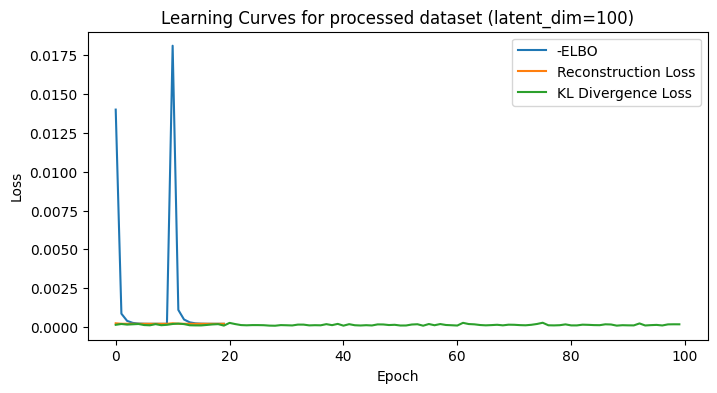

In [ ]:

# Hyperparameters and settings
batch_size = 512
epochs = 10
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []
latent_dim = 100
elbo_list = []
recon_list = []
reg_list = []

input_dim = proc_train.shape[1]

for ds_name, (X_train_np, X_test_np) in datasets.items():
    
    # Create PyTorch datasets and loaders
    X_train = torch.tensor(X_train_np.A, dtype=torch.float32)
    X_test = torch.tensor(X_test_np.A, dtype=torch.float32)
    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=False)

    # Encoder and decoder parameters
    enc_hidden_dims = 256
    dec_hidden_dims = 256

    # model and optimizer initialization
    model3 = VAE(input_dim, enc_hidden_dims, dec_hidden_dims, latent_dim).to(device)
    optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

    # Training/testing loop
    for epoch in range(1, epochs + 1):
        elbo, recon_loss, reg_loss, latent_train = train_f(model3, train_loader, optimizer, device, epoch)
        elbo_t, recon_loss_t, reg_loss_t, latent_test = test_f(model3, test_loader, device)
        
        elbo_list.append(elbo)
        recon_list.append(float(recon_loss))
        reg_list.append(reg_loss)

    # tables
    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo,
                "Reconstruction": recon_loss,
                "Regularization": reg_loss}
                )

    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo_t,
                "Reconstruction": recon_loss_t,
                "Regularization": reg_loss_t}
                )


    # Plot the learning curves
    
plt.figure(figsize=(8, 4))
plt.plot(elbo_list, label="-ELBO")
plt.plot(recon_list, label="Reconstruction Loss")
plt.plot(reg_list[0].tolist(), label="KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curves for {ds_name} dataset (latent_dim={latent_dim})")
plt.legend()
plt.show()


        
#torch.save(model3.state_dict(), f"{output_dir}/model3.pt")

In [12]:
results

[{'Dataset': 'preprocessed',
  'Latent dim': 100,
  'ELBO': 0.00020387414613779516,
  'Reconstruction': tensor(0.0002, grad_fn=<DivBackward0>),
  'Regularization': tensor([9.4928e-12, 9.9055e-12, 1.1556e-11, 9.0800e-12, 4.5400e-12, 7.4291e-12,
          1.4446e-11, 8.2546e-12, 6.6037e-12, 7.8418e-12, 6.6037e-12, 7.4291e-12,
          1.0318e-11, 7.4291e-12, 9.9055e-12, 7.0164e-12, 7.8418e-12, 7.0164e-12,
          1.8986e-11, 8.6673e-12, 1.1969e-11, 1.1556e-11, 1.0731e-11, 4.1273e-12,
          8.6673e-12, 1.1144e-11, 7.4291e-12, 9.4928e-12, 1.0731e-11, 4.9527e-12,
          3.7146e-12, 7.0164e-12, 2.0636e-11, 9.9055e-12, 9.9055e-12, 9.4928e-12,
          9.0800e-12, 1.1144e-11, 1.6509e-11, 1.1969e-11, 9.9055e-12, 1.2795e-11,
          6.1909e-12, 1.6509e-12, 6.6037e-12, 1.0318e-11, 4.5400e-12, 7.0164e-12,
          1.2795e-11, 9.0800e-12, 6.1909e-12, 2.0636e-12, 1.1556e-11, 4.1273e-12,
          6.1909e-12, 8.2546e-12, 7.0164e-12, 7.8418e-12, 6.6037e-12, 1.1144e-11,
          7.0164e-

In [13]:
results3 = [{'Dataset': 'preprocessed',
  'Latent dim': 100,
  'ELBO': 0.00020387414613779516,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([9.4928e-12, 9.9055e-12, 1.1556e-11, 9.0800e-12, 4.5400e-12, 7.4291e-12,
          1.4446e-11, 8.2546e-12, 6.6037e-12, 7.8418e-12, 6.6037e-12, 7.4291e-12,
          1.0318e-11, 7.4291e-12, 9.9055e-12, 7.0164e-12, 7.8418e-12, 7.0164e-12,
          1.8986e-11, 8.6673e-12, 1.1969e-11, 1.1556e-11, 1.0731e-11, 4.1273e-12,
          8.6673e-12, 1.1144e-11, 7.4291e-12, 9.4928e-12, 1.0731e-11, 4.9527e-12,
          3.7146e-12, 7.0164e-12, 2.0636e-11, 9.9055e-12, 9.9055e-12, 9.4928e-12,
          9.0800e-12, 1.1144e-11, 1.6509e-11, 1.1969e-11, 9.9055e-12, 1.2795e-11,
          6.1909e-12, 1.6509e-12, 6.6037e-12, 1.0318e-11, 4.5400e-12, 7.0164e-12,
          1.2795e-11, 9.0800e-12, 6.1909e-12, 2.0636e-12, 1.1556e-11, 4.1273e-12,
          6.1909e-12, 8.2546e-12, 7.0164e-12, 7.8418e-12, 6.6037e-12, 1.1144e-11,
          7.0164e-12, 8.6673e-12, 9.9055e-12, 4.9527e-12, 9.9055e-12, 5.7782e-12,
          8.6673e-12, 9.9055e-12, 7.4291e-12, 1.2382e-11, 7.0164e-12, 7.0164e-12,
          1.0318e-11, 1.0731e-11, 1.1556e-11, 1.0318e-11, 8.6673e-12, 9.0800e-12,
          6.1909e-12, 7.8418e-12, 1.3207e-11, 1.0318e-11, 7.4291e-12, 1.6922e-11,
          6.6037e-12, 2.0636e-12, 6.6037e-12, 2.4764e-12, 3.7146e-12, 1.3620e-11,
          7.4291e-12, 4.1273e-12, 1.3207e-11, 1.0731e-11, 3.7146e-12, 1.0318e-11,
          5.3655e-12, 1.0731e-11, 4.1273e-12, 1.0318e-11])},
 {'Dataset': 'preprocessed',
  'Latent dim': 100,
  'ELBO': 0.0001778433107850017,
  'Reconstruction': 0.0002,
  'Regularization': 0},
 {'Dataset': 'processed',
  'Latent dim': 100,
  'ELBO': 0.0002030222602403206,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([4.7464e-11, 1.3207e-11, 1.6096e-11, 2.0224e-11, 3.7971e-11, 4.4162e-11,
          2.1462e-11, 1.0731e-11, 4.0860e-11, 1.4858e-11, 1.9398e-11, 8.6673e-12,
          5.1591e-11, 3.2193e-11, 1.4858e-11, 2.7653e-11, 2.0636e-11, 2.4351e-11,
          1.0731e-11, 3.7558e-11, 1.4446e-11, 2.0224e-11, 3.1367e-11, 2.1049e-11,
          1.6509e-11, 1.6096e-11, 3.3018e-11, 1.2382e-11, 2.1875e-11, 3.2606e-11,
          2.6827e-11, 2.6415e-11, 1.8986e-11, 1.7335e-11, 4.7464e-11, 1.4446e-11,
          2.8066e-11, 2.7240e-11, 1.6922e-11, 3.7971e-11, 2.1875e-11, 2.9716e-11,
          2.4764e-11, 2.4351e-11, 3.7971e-11, 1.4446e-11, 1.7335e-11, 1.9811e-11,
          2.0224e-11, 2.1049e-11, 1.9811e-11, 1.4033e-11, 2.0224e-11, 1.1144e-11,
          2.0636e-11, 2.4351e-11, 2.2700e-11, 3.0129e-11, 2.3113e-11, 1.8573e-11,
          3.2606e-11, 1.6922e-11, 3.5907e-11, 2.8478e-11, 2.0636e-11, 2.8478e-11,
          2.1462e-11, 2.4764e-11, 2.3938e-11, 2.5176e-11, 2.0224e-11, 2.9304e-11,
          2.6827e-11, 2.6827e-11, 2.1462e-11, 1.5684e-11, 1.1969e-11, 1.8986e-11,
          4.2924e-11, 3.3018e-11, 3.2606e-11, 2.3113e-11, 2.3526e-11, 1.6509e-11,
          2.3938e-11, 4.5813e-11, 1.2795e-11, 1.7747e-11, 5.1178e-11, 2.2700e-11,
          3.0129e-11, 1.8160e-11, 2.2700e-11, 2.5176e-11, 2.8478e-11, 2.5176e-11,
          5.8607e-11, 3.5082e-11, 3.0955e-11, 2.9716e-11])},
 {'Dataset': 'processed',
  'Latent dim': 100,
  'ELBO': 0.00017733334047967885,
  'Reconstruction': 0.0002,
  'Regularization': 0}]

results3_df = pd.DataFrame(results3)
results3_df

Dataset  Latent dim      ELBO  Reconstruction  Regularization
0  preprocessed         100  0.000204          0.0002    8.687926e-12
1  preprocessed         100  0.000178          0.0002    0.000000e+00
2     processed         100  0.000203          0.0002    2.511867e-11
3     processed         100  0.000177          0.0002    0.000000e+00

### testing different sizes of hidden layer

#### hidden layer = 512

Train Epoch: 1 [0/72208 (0%)]	Loss: 0.290733
Train Epoch: 1 [5120/72208 (7%)]	Loss: 0.010602
Train Epoch: 1 [10240/72208 (14%)]	Loss: 0.004636
Train Epoch: 1 [15360/72208 (21%)]	Loss: 0.003582
Train Epoch: 1 [20480/72208 (28%)]	Loss: 0.002664
Train Epoch: 1 [25600/72208 (35%)]	Loss: 0.002294
Train Epoch: 1 [30720/72208 (42%)]	Loss: 0.002053
Train Epoch: 1 [35840/72208 (49%)]	Loss: 0.001835
Train Epoch: 1 [40960/72208 (56%)]	Loss: 0.001652
Train Epoch: 1 [46080/72208 (63%)]	Loss: 0.001522
Train Epoch: 1 [51200/72208 (70%)]	Loss: 0.001391
Train Epoch: 1 [56320/72208 (77%)]	Loss: 0.001267
Train Epoch: 1 [61440/72208 (85%)]	Loss: 0.001156
Train Epoch: 1 [66560/72208 (92%)]	Loss: 0.001080
Train Epoch: 1 [71680/72208 (99%)]	Loss: 0.000998
====> Epoch: 1 Average loss: 0.0119
====> Test set loss: 0.0002
Train Epoch: 2 [0/72208 (0%)]	Loss: 0.000988
Train Epoch: 2 [5120/72208 (7%)]	Loss: 0.000910
Train Epoch: 2 [10240/72208 (14%)]	Loss: 0.000855
Train Epoch: 2 [15360/72208 (21%)]	Loss: 0.000810


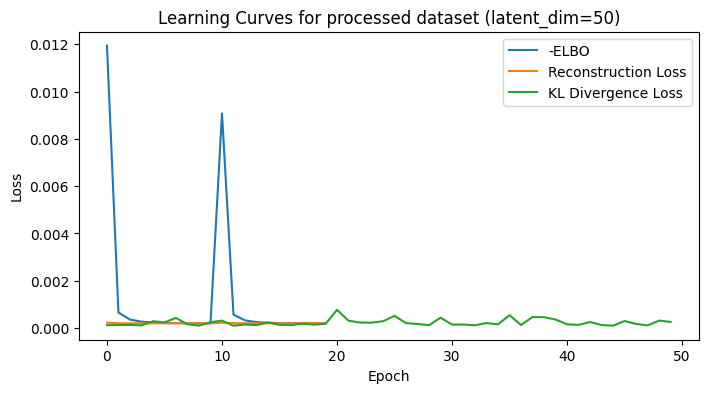

In [11]:

# Hyperparameters and settings
batch_size = 512
epochs = 10
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []
latent_dim = 50
elbo_list = []
recon_list = []
reg_list = []

input_dim = proc_train.shape[1]

for ds_name, (X_train_np, X_test_np) in datasets.items():
    
    # Create PyTorch datasets and loaders
    X_train = torch.tensor(X_train_np.A, dtype=torch.float32)
    X_test = torch.tensor(X_test_np.A, dtype=torch.float32)
    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=False)

    # Encoder and decoder parameters
    enc_hidden_dims = 512
    dec_hidden_dims = 512

    # model and optimizer initialization
    model4 = VAE(input_dim, enc_hidden_dims, dec_hidden_dims, latent_dim).to(device)
    optimizer = optim.Adam(model4.parameters(), lr=learning_rate)

    # Training loop
    

    for epoch in range(1, epochs + 1):
        elbo, recon_loss, reg_loss, latent_train = train_f(model4, train_loader, optimizer, device, epoch)
        #print(">>>>", float(recon_loss))
        elbo_t, recon_loss_t, reg_loss_t, latent_test = test_f(model4, test_loader, device)
        
        #print(">>>>", elbo)
        elbo_list.append(elbo)
        recon_list.append(float(recon_loss))
        #print("<<<<", recon_list)
        reg_list.append(reg_loss)

                # tables
    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo,
                "Reconstruction": recon_loss,
                "Regularization": reg_loss}
                )

    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo_t,
                "Reconstruction": recon_loss_t,
                "Regularization": reg_loss_t}
                )





    # Plot the learning curves
    
plt.figure(figsize=(8, 4))
plt.plot(elbo_list, label="-ELBO")
plt.plot(recon_list, label="Reconstruction Loss")
plt.plot(reg_list[0].tolist(), label="KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curves for {ds_name} dataset (latent_dim={latent_dim})")
plt.legend()
plt.show()


        
torch.save(model4.state_dict(), f"{output_dir}/model4.pt")

In [12]:
results

[{'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.00020237936411913896,
  'Reconstruction': tensor(0.0002, grad_fn=<DivBackward0>),
  'Regularization': tensor([8.2034e-09, 9.9922e-10, 3.7988e-09, 1.2658e-09, 1.2691e-09, 9.0800e-10,
          1.7281e-09, 2.3484e-09, 2.2250e-09, 1.0293e-09, 1.1111e-09, 1.6043e-09,
          1.6637e-09, 1.9642e-09, 1.4124e-09, 1.0281e-09, 1.5708e-09, 1.2394e-09,
          1.9856e-09, 1.6447e-09, 2.8676e-09, 3.1107e-09, 1.7442e-09, 1.3967e-09,
          1.0236e-09, 3.1937e-09, 1.3480e-09, 7.9368e-10, 2.0385e-09, 1.0438e-09,
          1.9093e-09, 5.1170e-09, 1.5890e-09, 8.5352e-10, 1.9902e-09, 1.2733e-09,
          1.0768e-09, 2.6604e-09, 1.1197e-09, 2.1289e-09, 1.0574e-09, 7.8625e-10,
          2.4074e-09, 1.0351e-09, 2.2580e-09, 1.2877e-09, 1.3360e-09, 2.2225e-09,
          1.4767e-09, 1.2419e-09], grad_fn=<DivBackward0>)},
 {'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.0001762857728338733,
  'Reconstruction': tensor(0.0002),
  'R

In [ ]:
results4 = [{'Dataset': 'preprocessed',
  'hidden size': 512,
  'ELBO': 0.00020237936411913896,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([8.2034e-09, 9.9922e-10, 3.7988e-09, 1.2658e-09, 1.2691e-09, 9.0800e-10,
          1.7281e-09, 2.3484e-09, 2.2250e-09, 1.0293e-09, 1.1111e-09, 1.6043e-09,
          1.6637e-09, 1.9642e-09, 1.4124e-09, 1.0281e-09, 1.5708e-09, 1.2394e-09,
          1.9856e-09, 1.6447e-09, 2.8676e-09, 3.1107e-09, 1.7442e-09, 1.3967e-09,
          1.0236e-09, 3.1937e-09, 1.3480e-09, 7.9368e-10, 2.0385e-09, 1.0438e-09,
          1.9093e-09, 5.1170e-09, 1.5890e-09, 8.5352e-10, 1.9902e-09, 1.2733e-09,
          1.0768e-09, 2.6604e-09, 1.1197e-09, 2.1289e-09, 1.0574e-09, 7.8625e-10,
          2.4074e-09, 1.0351e-09, 2.2580e-09, 1.2877e-09, 1.3360e-09, 2.2225e-09,
          1.4767e-09, 1.2419e-09])},
 {'Dataset': 'preprocessed',
  'hidden size': 512,
  'ELBO': 0.0001762857728338733,
  'Reconstruction': 0.0002,
  'Regularization': 0},
 {'Dataset': 'processed',
  'hidden size': 512,
  'ELBO': 0.00020313909365643875,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([2.4813e-09, 7.2228e-09, 3.0245e-09, 8.5299e-09, 2.0868e-09, 3.6357e-09,
          1.3848e-08, 1.1445e-09, 3.0195e-09, 2.8433e-09, 1.6860e-09, 2.7170e-09,
          3.8669e-09, 6.9941e-09, 1.5291e-08, 2.1577e-09, 2.2679e-09, 1.0639e-08,
          1.9378e-09, 4.4042e-09, 3.5491e-09, 6.4848e-09, 3.6324e-09, 4.3935e-09,
          4.7431e-09, 2.6456e-09, 2.9993e-09, 4.8677e-09, 1.8981e-09, 3.6225e-09,
          2.5779e-09, 3.7228e-09, 1.8263e-09, 4.8818e-09, 2.0129e-09, 4.6754e-09,
          2.2977e-09, 1.0533e-08, 2.2279e-09, 1.1614e-09, 1.3743e-08, 1.6109e-09,
          1.7413e-09, 1.8185e-09, 1.2535e-09, 5.7212e-09, 1.0002e-08, 1.9782e-09,
          3.0410e-09, 5.5574e-09])},
 {'Dataset': 'processed',
  'hidden size': 512,
  'ELBO': 0.0001767957997862262,
  'Reconstruction': 0.0002,
  'Regularization': 0}]

In [14]:
results4_df = pd.DataFrame(results4)
results4_df

Dataset  Latent dim      ELBO  Reconstruction  Regularization
0  preprocessed          50  0.000202          0.0002    1.847739e-09
1  preprocessed          50  0.000176          0.0002    0.000000e+00
2     processed          50  0.000203          0.0002    4.420362e-09
3     processed          50  0.000177          0.0002    0.000000e+00

### hidden layer =  1024

Train Epoch: 1 [0/72208 (0%)]	Loss: 0.251217
Train Epoch: 1 [5120/72208 (7%)]	Loss: 0.005635
Train Epoch: 1 [10240/72208 (14%)]	Loss: 0.002958
Train Epoch: 1 [15360/72208 (21%)]	Loss: 0.002255
Train Epoch: 1 [20480/72208 (28%)]	Loss: 0.001800
Train Epoch: 1 [25600/72208 (35%)]	Loss: 0.001661
Train Epoch: 1 [30720/72208 (42%)]	Loss: 0.001533
Train Epoch: 1 [35840/72208 (49%)]	Loss: 0.001417
Train Epoch: 1 [40960/72208 (56%)]	Loss: 0.001337
Train Epoch: 1 [46080/72208 (63%)]	Loss: 0.001272
Train Epoch: 1 [51200/72208 (70%)]	Loss: 0.001185
Train Epoch: 1 [56320/72208 (77%)]	Loss: 0.001138
Train Epoch: 1 [61440/72208 (85%)]	Loss: 0.001059
Train Epoch: 1 [66560/72208 (92%)]	Loss: 0.001021
Train Epoch: 1 [71680/72208 (99%)]	Loss: 0.000937
====> Epoch: 1 Average loss: 0.0242
====> Test set loss: 0.0002
Train Epoch: 2 [0/72208 (0%)]	Loss: 0.000932
Train Epoch: 2 [5120/72208 (7%)]	Loss: 0.000882
Train Epoch: 2 [10240/72208 (14%)]	Loss: 0.000849
Train Epoch: 2 [15360/72208 (21%)]	Loss: 0.000801


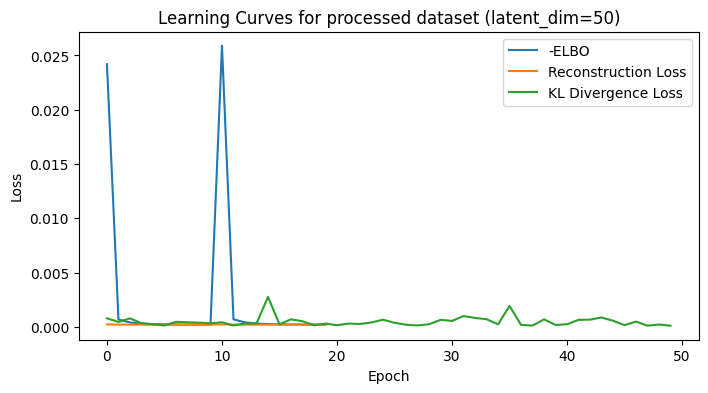

In [12]:

# Hyperparameters and settings
batch_size = 512
epochs = 10
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []
latent_dim = 50
elbo_list = []
recon_list = []
reg_list = []

input_dim = proc_train.shape[1]

for ds_name, (X_train_np, X_test_np) in datasets.items():
    
    # Create PyTorch datasets and loaders
    X_train = torch.tensor(X_train_np.A, dtype=torch.float32)
    X_test = torch.tensor(X_test_np.A, dtype=torch.float32)
    train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=False)

    # Encoder and decoder parameters
    enc_hidden_dims = 1024
    dec_hidden_dims = 1024

    # model and optimizer initialization
    model5 = VAE(input_dim, enc_hidden_dims, dec_hidden_dims, latent_dim).to(device)
    optimizer = optim.Adam(model5.parameters(), lr=learning_rate)

    # Training loop
    

    for epoch in range(1, epochs + 1):
        elbo, recon_loss, reg_loss, latent_train = train_f(model5, train_loader, optimizer, device, epoch)
        #print(">>>>", float(recon_loss))
        elbo_t, recon_loss_t, reg_loss_t, latent_test = test_f(model5, test_loader, device)
        
        #print(">>>>", elbo)
        elbo_list.append(elbo)
        recon_list.append(float(recon_loss))
        #print("<<<<", recon_list)
        reg_list.append(reg_loss)

                # tables
    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo,
                "Reconstruction": recon_loss,
                "Regularization": reg_loss}
                )

    results.append({"Dataset": ds_name,
                "Latent dim": latent_dim,
                "ELBO": elbo_t,
                "Reconstruction": recon_loss_t,
                "Regularization": reg_loss_t}
                )





    # Plot the learning curves
    
plt.figure(figsize=(8, 4))
plt.plot(elbo_list, label="-ELBO")
plt.plot(recon_list, label="Reconstruction Loss")
plt.plot(reg_list[0].tolist(), label="KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Learning Curves for {ds_name} dataset (latent_dim={latent_dim})")
plt.legend()
plt.show()


        
torch.save(model5.state_dict(), f"{output_dir}/model5.pt")

In [13]:
results

[{'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.000206589228280653,
  'Reconstruction': tensor(0.0002, grad_fn=<DivBackward0>),
  'Regularization': tensor([1.2292e-07, 8.9594e-08, 9.9981e-08, 7.5407e-08, 6.7378e-08, 4.0434e-08,
          6.0203e-08, 6.9161e-08, 8.1882e-08, 7.9560e-08, 5.1736e-08, 3.4249e-08,
          1.0054e-07, 6.9487e-08, 9.0573e-08, 5.0237e-08, 1.2347e-07, 8.3811e-08,
          4.9271e-08, 5.7234e-08, 5.0282e-08, 5.9127e-08, 7.4095e-08, 1.0246e-07,
          7.1657e-08, 5.6739e-08, 5.7295e-08, 6.2166e-08, 6.1951e-08, 1.4596e-07,
          7.6646e-08, 7.3048e-08, 6.2119e-08, 6.3188e-08, 5.7127e-08, 9.5971e-08,
          7.0497e-08, 4.3431e-08, 1.5153e-07, 5.3175e-08, 7.0757e-08, 7.5708e-08,
          8.5377e-08, 8.3316e-08, 6.4014e-08, 5.3755e-08, 1.0204e-07, 4.5038e-08,
          5.5323e-08, 3.1956e-08], grad_fn=<DivBackward0>)},
 {'Dataset': 'preprocessed',
  'Latent dim': 50,
  'ELBO': 0.0001767458430902672,
  'Reconstruction': tensor(0.0002),
  'Reg

In [ ]:
results5 = [{'Dataset': 'preprocessed',
  'hidden size': 1024,
  'ELBO': 0.000206589228280653,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([1.2292e-07, 8.9594e-08, 9.9981e-08, 7.5407e-08, 6.7378e-08, 4.0434e-08,
          6.0203e-08, 6.9161e-08, 8.1882e-08, 7.9560e-08, 5.1736e-08, 3.4249e-08,
          1.0054e-07, 6.9487e-08, 9.0573e-08, 5.0237e-08, 1.2347e-07, 8.3811e-08,
          4.9271e-08, 5.7234e-08, 5.0282e-08, 5.9127e-08, 7.4095e-08, 1.0246e-07,
          7.1657e-08, 5.6739e-08, 5.7295e-08, 6.2166e-08, 6.1951e-08, 1.4596e-07,
          7.6646e-08, 7.3048e-08, 6.2119e-08, 6.3188e-08, 5.7127e-08, 9.5971e-08,
          7.0497e-08, 4.3431e-08, 1.5153e-07, 5.3175e-08, 7.0757e-08, 7.5708e-08,
          8.5377e-08, 8.3316e-08, 6.4014e-08, 5.3755e-08, 1.0204e-07, 4.5038e-08,
          5.5323e-08, 3.1956e-08])},
 {'Dataset': 'preprocessed',
  'hidden size': 1024,
  'ELBO': 0.0001767458430902672,
  'Reconstruction': 0.0002,
  'Regularization': 0},
 {'Dataset': 'processed',
  'hidden size': 1024,
  'ELBO': 0.00020681800376050175,
  'Reconstruction': 0.0002,
  'Regularization': np.mean([6.7659e-08, 8.5748e-08, 1.3191e-07, 1.0377e-07, 6.4240e-08, 7.4296e-08,
          5.1267e-08, 6.9080e-08, 9.3782e-08, 8.0280e-08, 7.1157e-08, 8.5441e-08,
          7.9343e-08, 7.4034e-08, 7.9227e-08, 7.9488e-08, 7.0289e-08, 7.3889e-08,
          6.8678e-08, 5.9335e-08, 6.2105e-08, 7.9612e-08, 8.4220e-08, 1.0379e-07,
          7.4569e-08, 5.5697e-08, 7.3778e-08, 7.7847e-08, 8.7682e-08, 6.3241e-08,
          6.7046e-08, 9.6359e-08, 7.3370e-08, 5.8283e-08, 7.9451e-08, 7.6778e-08,
          7.4839e-08, 9.2292e-08, 1.3974e-07, 9.9465e-08, 9.8268e-08, 7.5003e-08,
          7.6808e-08, 4.2502e-08, 6.1624e-08, 5.7595e-08, 5.9380e-08, 8.2360e-08,
          1.1994e-07, 8.6513e-08])},
 {'Dataset': 'processed',
  'hidden size': 1024,
  'ELBO': 0.00017629911099103875,
  'Reconstruction': 0.0002,
  'Regularization': 0}]

### latent space visualization

In [23]:
def to_latent(data, input_dim):
    latent = []
    encoder = Encoder(input_dim, hidden_dim=256, latent_dim=256, dropout=0, z_dropout=0)  
    m, v = encoder(data)  
    latent += [m.to("cpu")]
    return torch.cat(latent).detach().numpy()


In [43]:
data = torch.tensor(proc_train.A, dtype=torch.float32)
latent = to_latent(data, input_dim=input_dim)

In [45]:
train.obsm['latent_embedding'] = latent

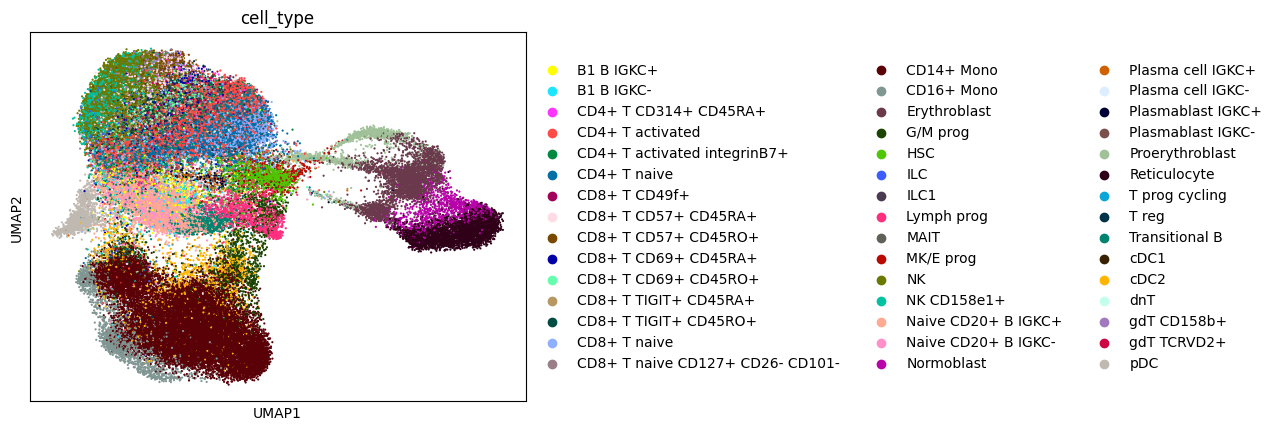

In [ ]:
scanpy.pp.neighbors(train, use_rep='latent_embedding', n_neighbors=15) 
scanpy.tl.umap(train, random_state=1) 
scanpy.pl.umap(train, color="cell_type", size=10, ncols = 1)

In [28]:
train.obsm['latent_model'] = latent_train

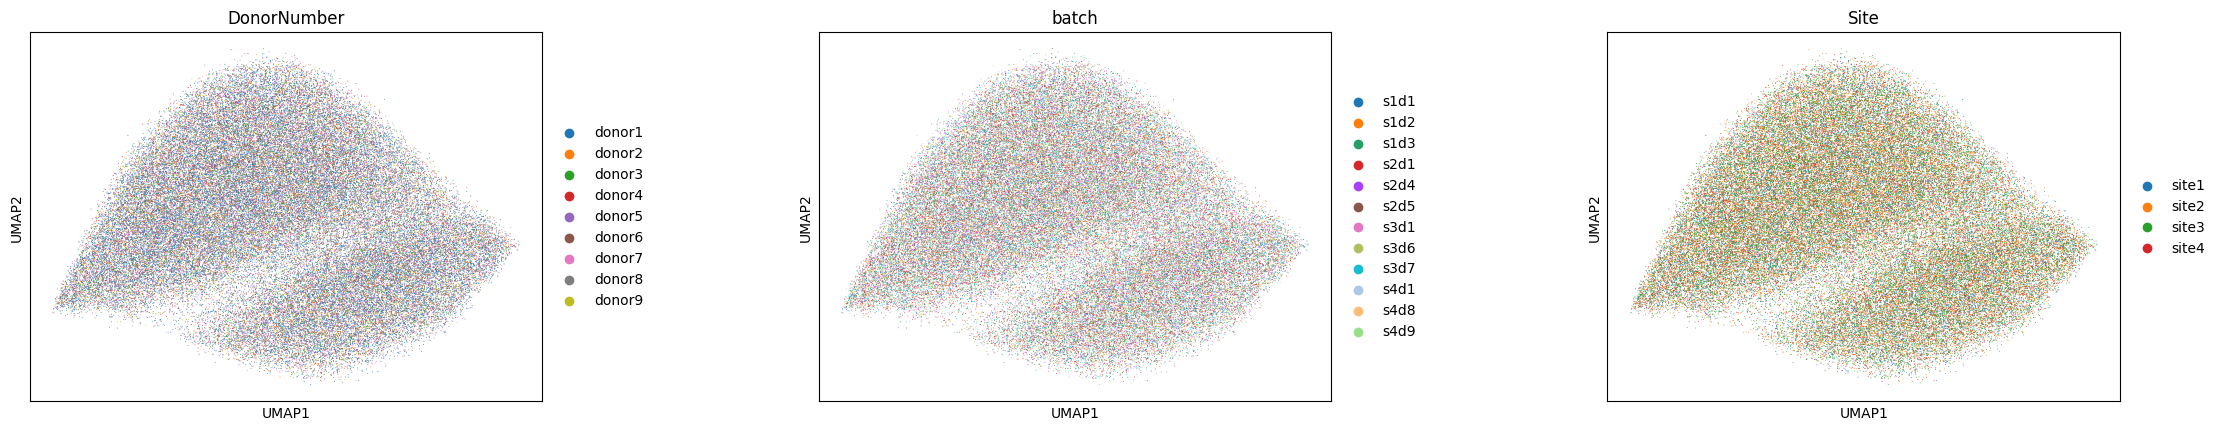

In [30]:
scanpy.pp.neighbors(train, use_rep="latent_model", n_neighbors=15, metric='euclidean')
scanpy.tl.umap(train)
scanpy.pl.umap(train, color=["DonorNumber", "batch", "Site"], wspace=0.4)

### comparing latent space on the test dataset

In [24]:
data = torch.tensor(proc_test.A, dtype=torch.float32)
latent = to_latent(data, input_dim=input_dim)

In [25]:
test.obsm['latent_embedding'] = latent

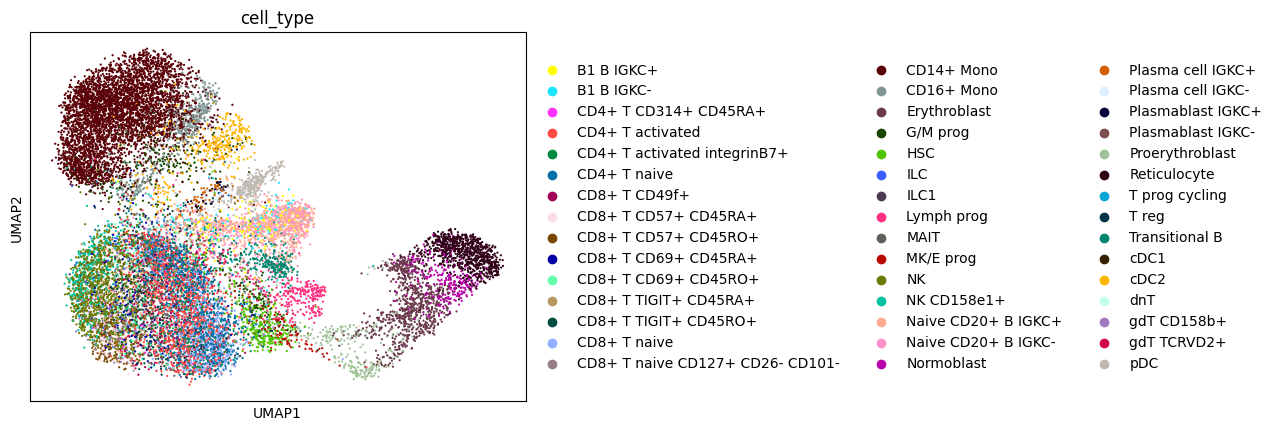

In [26]:
scanpy.pp.neighbors(test, use_rep='latent_embedding', n_neighbors=15) 
scanpy.tl.umap(test, random_state=1) 
scanpy.pl.umap(test, color="cell_type", size=10, ncols = 1)

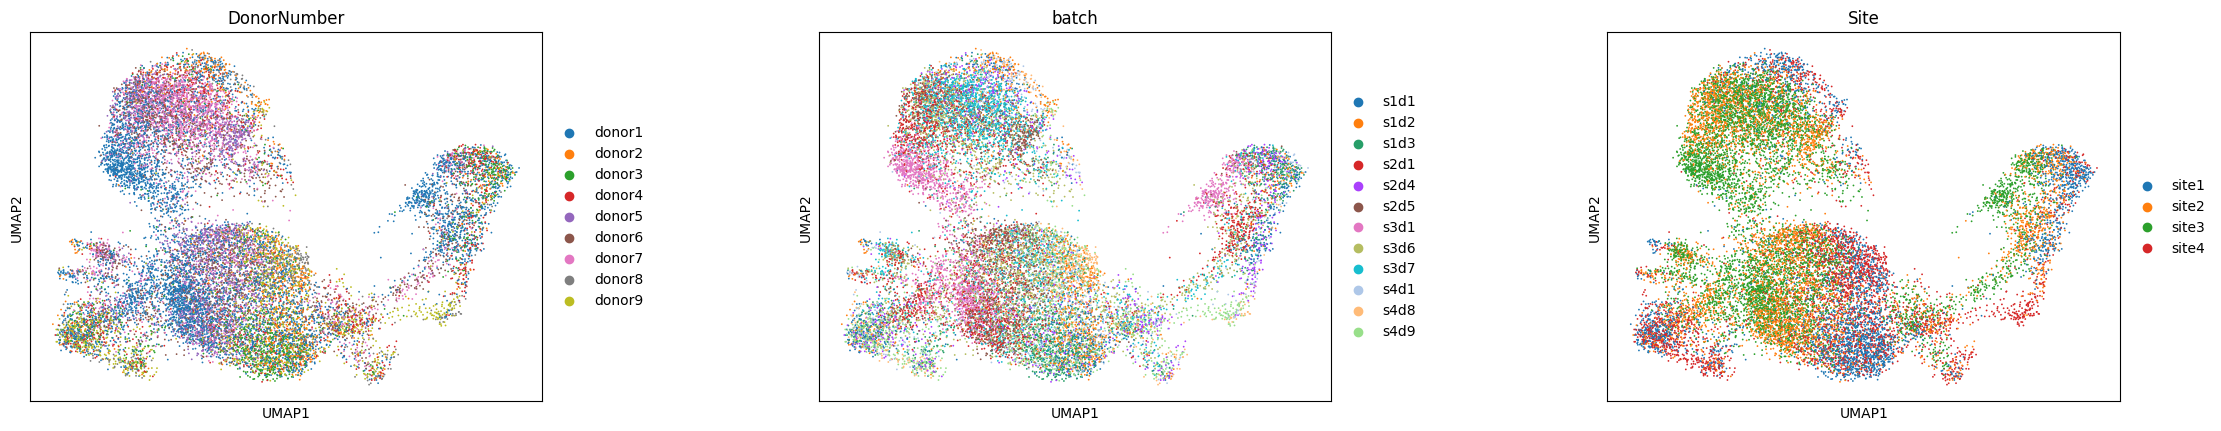

In [29]:
scanpy.pp.neighbors(test, use_rep="latent_embedding", n_neighbors=15, metric='euclidean')
scanpy.tl.umap(test)
scanpy.pl.umap(test, color=["DonorNumber", "batch", "Site"], wspace=0.4)

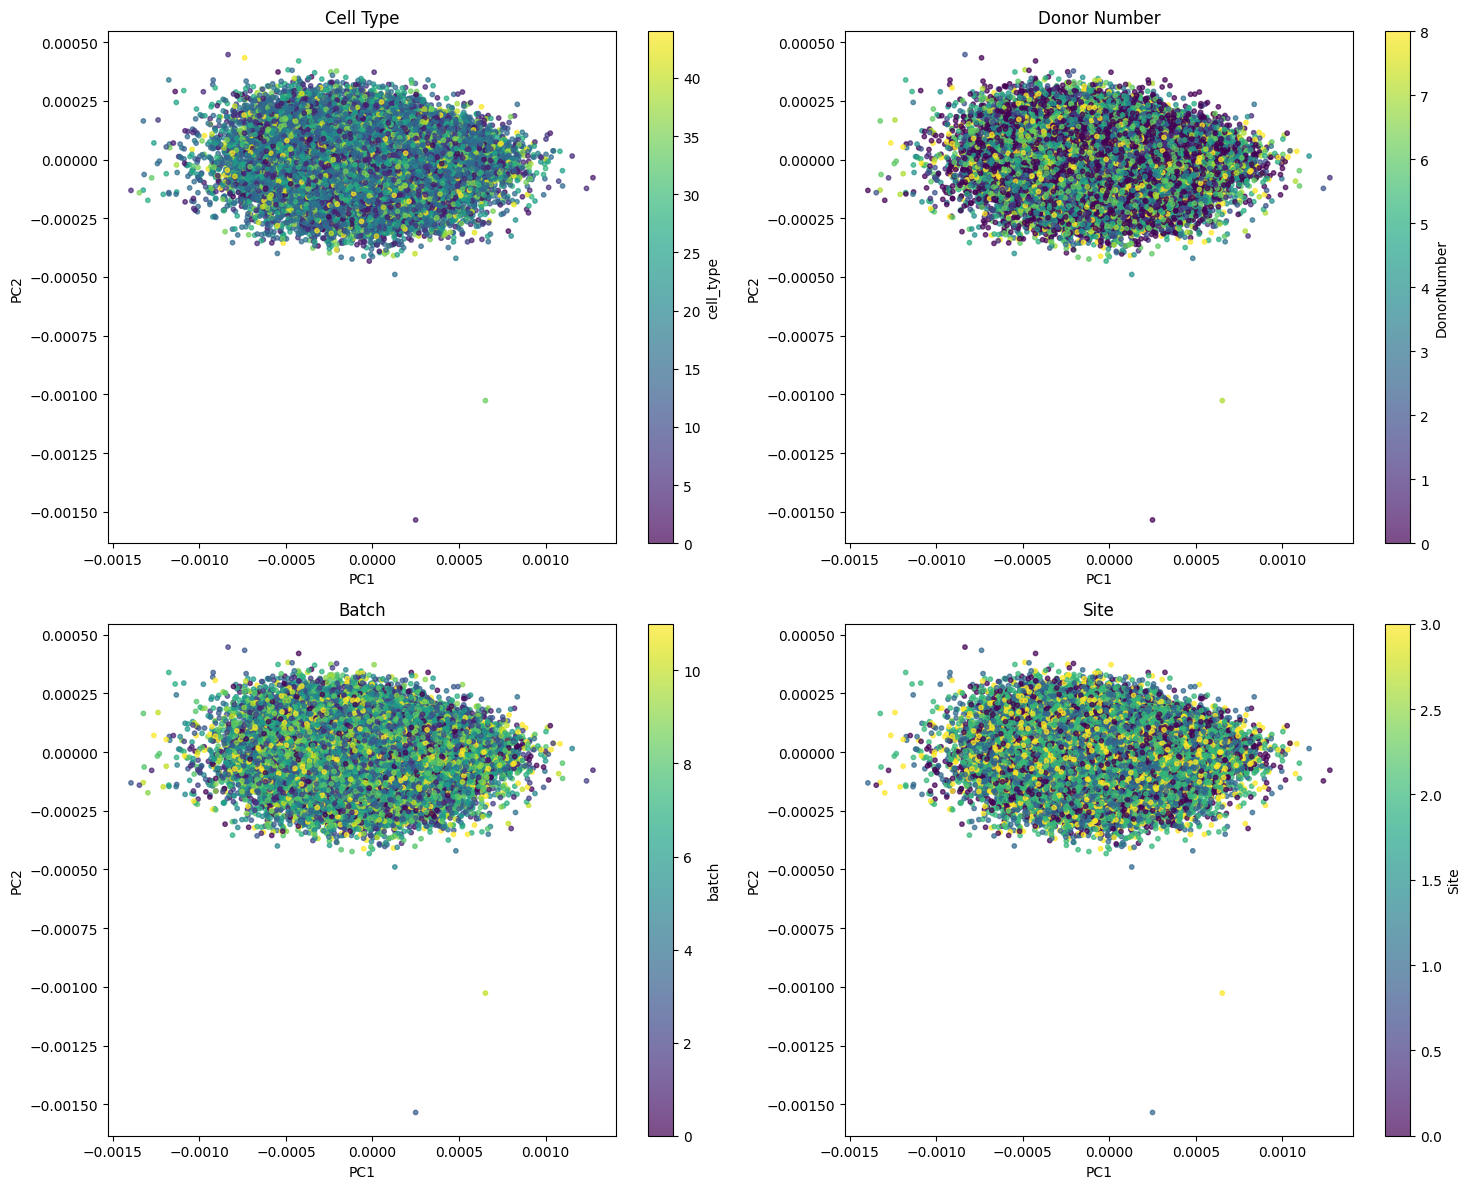

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the latent space
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_train)

train.obsm['X_pca'] = latent_pca

plot_vars = ['cell_type', 'DonorNumber', 'batch', 'Site']
titles = ['Cell Type', 'Donor Number', 'Batch', 'Site']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Iterate over the axes and plot each variable
for ax, var, title in zip(axes.flat, plot_vars, titles):
    # Ensure the observation column is treated as a categorical variable
    if not pd.api.types.is_categorical_dtype(train.obs[var]):
        train.obs[var] = train.obs[var].astype('category')
        
    # Convert categories to integer codes for coloring
    codes = train.obs[var].cat.codes
    scatter = ax.scatter(latent_pca[:, 0], latent_pca[:, 1],
                         c=codes, cmap='viridis', s=10, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    
    # Add a colorbar, colorbar reflects category codes.
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(var)

plt.tight_layout()
plt.show()
